<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:10px;"><i>by <a href="https://webgrec.ub.edu/webpages/000004/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=71605" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/01_Basics_NeuralNetworks.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/01_Basics_NeuralNetworks.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/01_Basics_NeuralNetworks.ipynb"  target="_blank" download="01_Basics_NeuralNetworks">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{I}$. Neural Networks with Pure Python

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/en/uab-official-masters-degrees-study-guides/) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

Tutorial 1

This notebook shows how to:
- implement the forward-pass (evaluation) of a deep, fully connected neural network in a few lines of python
- do that efficiently using batches
- illustrate the results for randomly initialized neural networks
- understand the role of weights and biases in networks
- understand the activation functions meanings and usages

**References**:

[1] [Machine Learning for Physicists](https://machine-learning-for-physicists.org/) by Florian Marquardt.<br>
[2] [NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html): the fundamental package for scientific computing in Python.<br>
[3] [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html): a comprehensive library for creating static, animated, and interactive visualizations in Python.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0-Imports:-only-numpy-and-matplotlib" data-toc-modified-id="0-Imports:-only-numpy-and-matplotlib-0">0 Imports: only numpy and matplotlib</a></span></li><li><span><a href="#1-A-very-simple-neural-network-(no-hidden-layer)" data-toc-modified-id="1-A-very-simple-neural-network-(no-hidden-layer)-1">1 A very simple neural network (no hidden layer)</a></span><ul class="toc-item"><li><span><a href="#1.1-Simple-implementation-(single-input)" data-toc-modified-id="1.1-Simple-implementation-(single-input)-1.1">1.1 Simple implementation (single input)</a></span></li><li><span><a href="#1.2-More-compact" data-toc-modified-id="1.2-More-compact-1.2">1.2 More compact</a></span></li><li><span><a href="#1.3-Multiple-inputs" data-toc-modified-id="1.3-Multiple-inputs-1.3">1.3 Multiple inputs</a></span></li><li><span><a href="#1.4-[EXERCISE]:-Try-with-another-activation-functions" data-toc-modified-id="1.4-[EXERCISE]:-Try-with-another-activation-functions-1.4">1.4 [EXERCISE]: Try with another activation functions</a></span></li></ul></li><li><span><a href="#2-NN-with-one-hidden-layer" data-toc-modified-id="2-NN-with-one-hidden-layer-2">2 NN with one hidden layer</a></span></li><li><span><a href="#3-'batch'-processing-of-Neural-Networks" data-toc-modified-id="3-'batch'-processing-of-Neural-Networks-3">3 'batch' processing of Neural Networks</a></span><ul class="toc-item"><li><span><a href="#3.1-Matrix-vector-multiplication-of-array-dimensions" data-toc-modified-id="3.1-Matrix-vector-multiplication-of-array-dimensions-3.1">3.1 Matrix-vector multiplication of array dimensions</a></span></li><li><span><a href="#3.2-Defining-functions-to-evaluate-a-layer,-and-a-network-with-batch-processing" data-toc-modified-id="3.2-Defining-functions-to-evaluate-a-layer,-and-a-network-with-batch-processing-3.2">3.2 Defining functions to evaluate a layer, and a network with batch processing</a></span></li><li><span><a href="#3.3-Now-visualize-this-multi-layer-net,-now-more-efficiently!" data-toc-modified-id="3.3-Now-visualize-this-multi-layer-net,-now-more-efficiently!-3.3">3.3 Now visualize this multi-layer net, now more efficiently!</a></span></li><li><span><a href="#3.4-A-network-with-MANY-hidden-layers-(same-size-each)" data-toc-modified-id="3.4-A-network-with-MANY-hidden-layers-(same-size-each)-3.4">3.4 A network with MANY hidden layers (same size each)</a></span></li></ul></li><li><span><a href="#4-Summing-up-in-general-functions" data-toc-modified-id="4-Summing-up-in-general-functions-4">4 Summing up in general functions</a></span></li><li><span><a href="#5-Fancy-visualization-of-Neural-Networks-with-Pure-Python" data-toc-modified-id="5-Fancy-visualization-of-Neural-Networks-with-Pure-Python-5">5 Fancy visualization of Neural Networks with Pure Python</a></span><ul class="toc-item"><li><span><a href="#5.1-Some-internal-routines-for-plotting-the-network" data-toc-modified-id="5.1-Some-internal-routines-for-plotting-the-network-5.1">5.1 Some internal routines for plotting the network</a></span></li><li><span><a href="#5.2-No-hidden-layer-NN" data-toc-modified-id="5.2-No-hidden-layer-NN-5.2">5.2 No hidden layer NN</a></span></li><li><span><a href="#5.3-Deep-dense-NN" data-toc-modified-id="5.3-Deep-dense-NN-5.3">5.3 Deep dense NN</a></span></li><li><span><a href="#5.4-Something-not-random" data-toc-modified-id="5.4-Something-not-random-5.4">5.4 Something not random</a></span></li></ul></li></ul></div>

## 0 Imports: only numpy and matplotlib

In [1]:
# get the "numpy" library for linear algebra
import numpy as np

# get "matplotlib" for plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300  # highres display
from matplotlib.axes._axes import _log as mpl_ax_logger
mpl_ax_logger.setLevel('ERROR')  # ignore warnings

# for nice inset colorbars:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# time control to count it and manage it
from time import time

## 1 A very simple neural network (no hidden layer)

The behavior of a neural network with $N_0$ input neurons and $N_1$ output neurons (no hidden layer) is

$$y^{\rm out}_j = f(\sum_k^{N_0} w_{jk} y^{\rm in}_k + b_j) \quad ; \quad j=1\dots N_1$$

where $w_{jk}$ is the weight connecting neurons $j$ and $k$, $b_j$ is the bias of neuron $k$, and $f(·)$ is the activation function (usually it is a non linear: for instance a sigmoid function). Notice that we can define a matrix $w$ of size $N_1\times N_0$, which contains all $w_{jk}$ connection weights. In the same way, we can condensate all biases $b_j$ in the $b$ vector of size $N_1$.

### 1.1 Simple implementation (single input)

In [2]:
N0 = 3  # input layer size
N1 = 2  # output layer size

# initialize random weights: array dimensions N1xN0
w = np.random.uniform(low=-1, high=+1, size=(N1,N0))

# initialize random biases: N1 vector
b = np.random.uniform(low=-1, high=+1, size=N1)

Let's start with an arbitrary input:

In [3]:
# input values
y_in = np.array([0.2, 0.4, -0.1])  # Why three values here?

In [4]:
# evaluate network by hand, in two steps
z = np.dot(w, y_in) + b  # result: the vector of 'z' values, length N1
y_out = 1 / (1 + np.exp(-z))  # the 'sigmoid' function (applied elementwise)

In [5]:
print("network input y_in:", y_in)
print("weights w:", w)
print("bias vector b:", b)
print("linear superposition z:", z)
print("network output y_out:", y_out)

network input y_in: [ 0.2  0.4 -0.1]
weights w: [[-0.44152571  0.52067577 -0.15890671]
 [ 0.57845406 -0.06416609  0.36981445]]
bias vector b: [0.87317842 0.27657668]
linear superposition z: [1.00903425 0.32961961]
network output y_out: [0.73283111 0.58166682]


### 1.2 More compact

Still stay with the simple network, but define a function that evaluates the network, and visualize the  output for various inputs

In [6]:
def apply_basic_net(y_in):
    """ Function that applies the network
    """
    global w, b  # let's use global variables. We could pass them as arguments
    
    z = np.dot(w, y_in) + b    
    return 1 / (1 + np.exp(-z))


Let's play with a different number of neurons

> **NOTE**: NNs with 2 input neurons and 1 output neuron are ideal to illustrate how it
works, because it allows us to visualize its behavior in a single picture. Let's see

In [7]:
N0 = 2  # input layer size
N1 = 1  # output layer size

w = np.random.uniform(low=-10, high=+10, size=(N1,N0))  # random weights: N1xN0
b = np.random.uniform(low=-1, high=+1, size=N1)         # biases: N1 vector

Define a valid input array

In [8]:
y_in = []  # Fill this array with random values: which size sould it have?
apply_basic_net(y_in)  # a simple test with an arbitrary input

ValueError: shapes (1,2) and (0,) not aligned: 2 (dim 1) != 0 (dim 0)

Which shape must `y_in` be? And the output? Why?

### 1.3 Multiple inputs

Let's see how the network acts with many different inputs `y_in`

In [9]:
M = 50  # Number of inputs to explore
y_out = np.zeros([M, M]) # array MxM, to hold the result

for j1 in range(M): 
    for j2 in range(M):
        # out of these integer indices, generate
        # two values in the range -0.5...0.5
        # and then apply the network to those two
        # values, being the input
        value0 = float(j1) / M - 0.5
        value1 = float(j2) / M - 0.5
        y_in = [value0, value1]
        y_out[j1, j2] = apply_basic_net(y_in)
        
print(y_out.shape)

(50, 50)


The output is an array (50 $\times$ 50) containing the results from all that combinations of values from -0.5 to 0.5.

> **Note**: this is NOT the most efficient way to do this! (but simple). Later we will learn how to use array syntax efficiently.

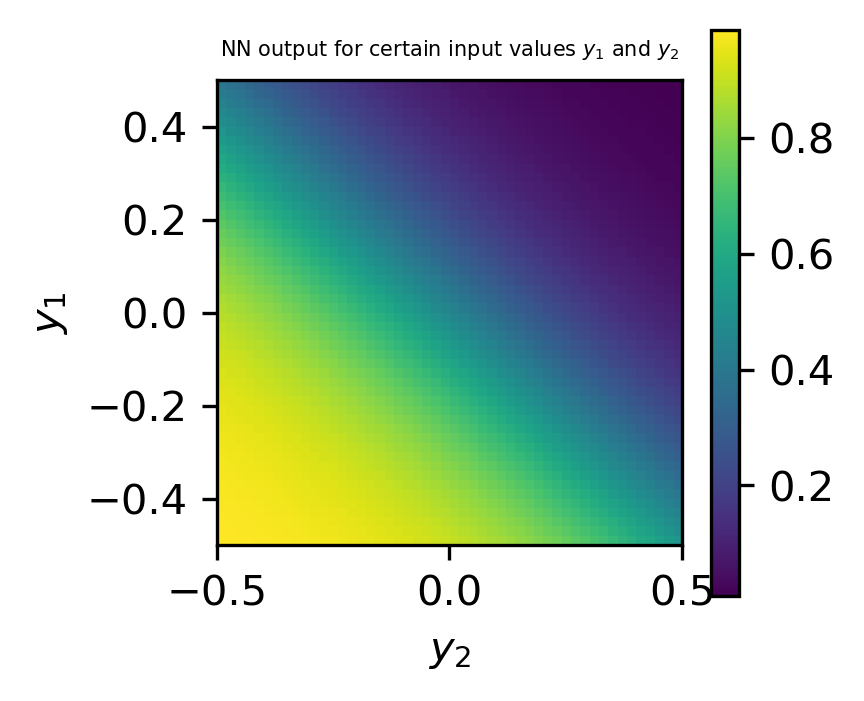

In [10]:
# display image
plt.figure(figsize=(2.5,2.5))
plt.imshow(y_out, origin='lower', extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title(r"NN output for certain input values $y_1$ and $y_2$", fontsize=5)
plt.xlabel(r"$y_2$")
plt.ylabel(r"$y_1$")
plt.show()

What represent this image? Which kind of image is this?

### 1.4 [EXERCISE]: Try with another activation functions

Some info about activation functions:

https://en.wikipedia.org/wiki/Activation_function

https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide

more in deep: https://mlfromscratch.com/activation-functions-explained

## 2 NN with one hidden layer

The idea here is to have multiple weight matrices (for each pair of subsequent layers, there is one weight matrix). The function that "applies a layer", i.e. goes from one layer to the next, is essentially the same as the function evaluating the simple network above. 

In [11]:
def apply_basic_layer(y_in, w, b):
    """ A function that evaluates one layer based on 
        the neuron values in the preceding layer.
        Now, we pass w and b as argument to be able 
        to accommodate them to a certain layer.
    """
    z = np.dot(w, y_in) + b  # exactly like before
    return 1 / (1 + np.exp(-z))

Pay attention on the array's sizes to initialize weighs and biases

In [12]:
N0 = 2  # input layer size
N1 = 30 # hidden layer size
N2 = 1  # output layer size

# weights and biases
# from input layer to hidden layer:
w1 = np.random.uniform(low=-10, high=+10, size=(N1,N0)) # random weights: N1xN0
b1 = np.random.uniform(low=-1, high=+1, size=N1)        # biases: N1 vector

# weights+biases from hidden layer to output layer:
w2 = np.random.uniform(low=-5, high=+5, size=(N2,N1)) # random weights: N2xN1
b2 = np.random.uniform(low=-1, high=+1, size=N2) # biases

So, let's apply every layer of our network using the function above

In [13]:
def apply_basic_net(y_in):
    """ Evaluate the network by subsequently evaluating the two steps 
        (input to hidden and hidden to output)
    """
    global w1, b1, w2, b2
    
    y1 = apply_basic_layer(y_in, w1, b1)
    y2 = apply_basic_layer(y1, w2, b2)
    
    return y2

Again, obtain values for a range of inputs

In [14]:
M = 300  # number of inputs to explore
y_out = np.zeros([M, M])  # array MxM, to hold the result

t0 = time()  # initial time
for j1 in range(M):
    for j2 in range(M):
        value0 = float(j1) / M - 0.5
        value1 = float(j2) / M - 0.5
        y_in = [value0, value1]
        y_out[j1, j2]=apply_basic_net(y_in)

print("Elapsed time: %.0f seconds for %d inputs." % (time()-t0, M**2))

Elapsed time: 3 seconds for 90000 inputs.


> **Note**: Again, this is NOT the most efficient way to do this! (but simple) Let's continue...

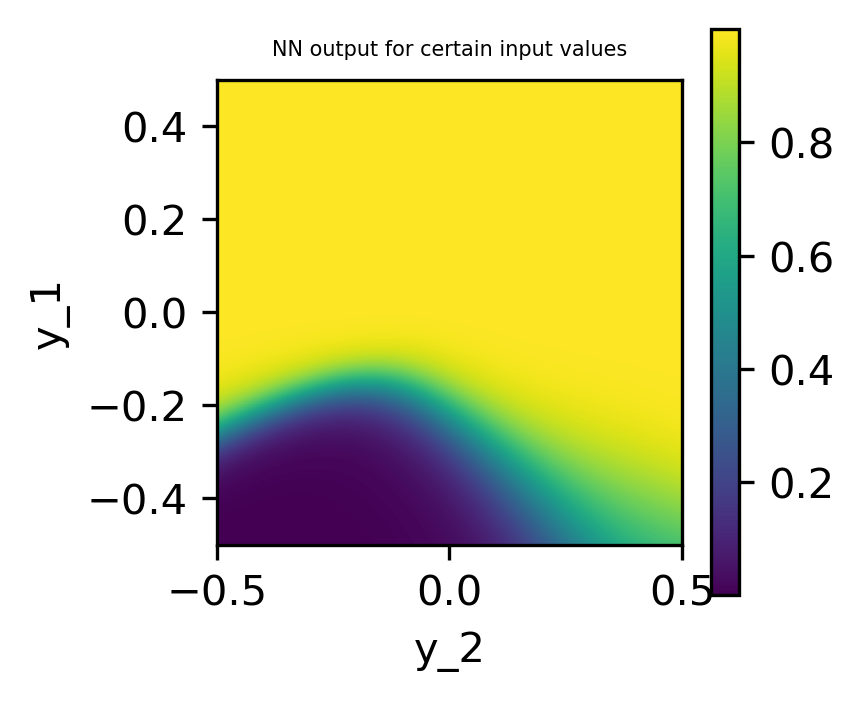

In [15]:
# display image
plt.figure(figsize=(2.5, 2.5))
plt.imshow(y_out, origin='lower', extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("NN output for certain input values", fontsize=5)
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

Obviously, the shape of the output is more 'complex' that of a simple network without any
hidden layer. Let's go further in that direction...

What differences are there between this images and the previous one?

## 3 'batch' processing of Neural Networks

Goal: apply a network to many samples in parallel (no 'for' loops like before!).
Let's solve the less efficient method commented above.

### 3.1 Matrix-vector multiplication of array dimensions

See how the dot product works in a no hidden layer NN (or a single step from one layer to the next in a more deep NN).

For instance, let's see with $N_0=8$ (input neurons), $N_1=7$ (output neurons) and $M=50$ (different inputs)

In [16]:
N0 = 8
N1 = 7
M = 50

W = np.zeros([N1, N0])  # Weight is N1xN0, like before
y = np.zeros([N0, M])   # Let's define a matrix to hold the M different inputs

(np.dot(W, y)).shape    # Let's see what happens

(7, 50)

Now, let's try to add the bias vector entries, in the most naive way (beware!)

In [17]:
B = np.zeros(N1)  # Bias size is corresponding with the output neurons
(np.dot(W, y) + B).shape  # will produce an error!

ValueError: operands could not be broadcast together with shapes (7,50) (7,) 

Why is that error? How can we avoid it?

Ok, we have to think a bit more...

Let's play with the order of the indices (arrays shapes).

Let's try to put the $M$ to the very beginning to hold the different inputs

In [18]:
y = np.zeros([M, N0])
(np.dot(y, W)).shape  # will produce an error! Why?

ValueError: shapes (50,8) and (7,8) not aligned: 8 (dim 1) != 7 (dim 0)

We have exploited out earlier... let's think

We can transpose the weight matrix

In [19]:
W = np.zeros([N0, N1])
(np.dot(y, W)).shape  # Fixed!

(50, 7)

Let's add again the bias vector

In [20]:
B = np.zeros(N1)
(np.dot(y, W) + B).shape  # Voila!

(50, 7)

This is the desired result, which contains 50 results for every 7 output neurons, calculated at once. In this case is just full of zeros, but we have asserted that the method in this way is consistent.

### 3.2 Defining functions to evaluate a layer, and a network with batch processing

Set up for batch processing, i.e. parallel evaluation of many input samples!

In [21]:
def apply_layer_batch(y_in, w, b):
    """ Function to apply a layer, just as before but ready for batch processing
    """
    z = np.dot(y_in, w) + b  # notice the different order in matrix product!
    return 1 / (1 + np.exp(-z))

In [22]:
def apply_net_batch(y_in): # exactly same as before
    global w1, b1, w2, b2
    
    y1 = apply_layer_batch(y_in, w1, b1)
    y2 = apply_layer_batch(y1, w2, b2)
    
    return y2

Let's define a NN model. Note that it is independent of the batch! It just
allows batching with the new ordering of the matrix indices

In [23]:
N0 = 2  # input layer size
N1 = 30  # hidden layer size
N2 = 1  # output layer size

# from input layer to hidden layer:
w1 = np.random.uniform(low=-10, high=+10, size=(N0,N1)) # NEW ORDER!! N0xN1
b1 = np.random.uniform(low=-1, high=+1, size=N1)        # biases: N1 vector

# from hidden layer to output layer:
w2 = np.random.uniform(low=-5, high=+5, size=(N1, N2)) # NEW ORDER N1xN2
b2 = np.random.uniform(low=-1, high=+1, size=N2) # biases

Let's define an input with a certain batch size

In [24]:
batchsize = 90000
y = np.random.uniform(low=-1, high=1, size=(batchsize,2))  # Why this 2 here??

In [25]:
t0 = time()
y_out = apply_net_batch(y)
print(f"Elapsed time: {time()-t0} seconds for {batchsize} inputs.")

Elapsed time: 0.19127416610717773 seconds for 90000 inputs.


In [26]:
np.shape(y_out)

(90000, 1)

These were 90,000 samples evaluated in parallel!!! (less than 0.1 seconds)

### 3.3 Now visualize this multi-layer net, now more efficiently!

Before, we had a two nested loops running all possible values for each input neuron. This was inefficient, but easy to calculate every combination of input values.
Now, we have to think a way to put all that possibilities in a batch array to calculate them at once. How to do that?

In [27]:
M = 300
# Generate a 'mesh grid', i.e. x,y values in an ordered way. Let's see
values = np.linspace(-0.5,0.5,M)  # This crates an array from -0.5 to 0.5 of M elements
v0, v1 = np.meshgrid(values, values)  # Check meshgrid documentation

Let's see what we did:

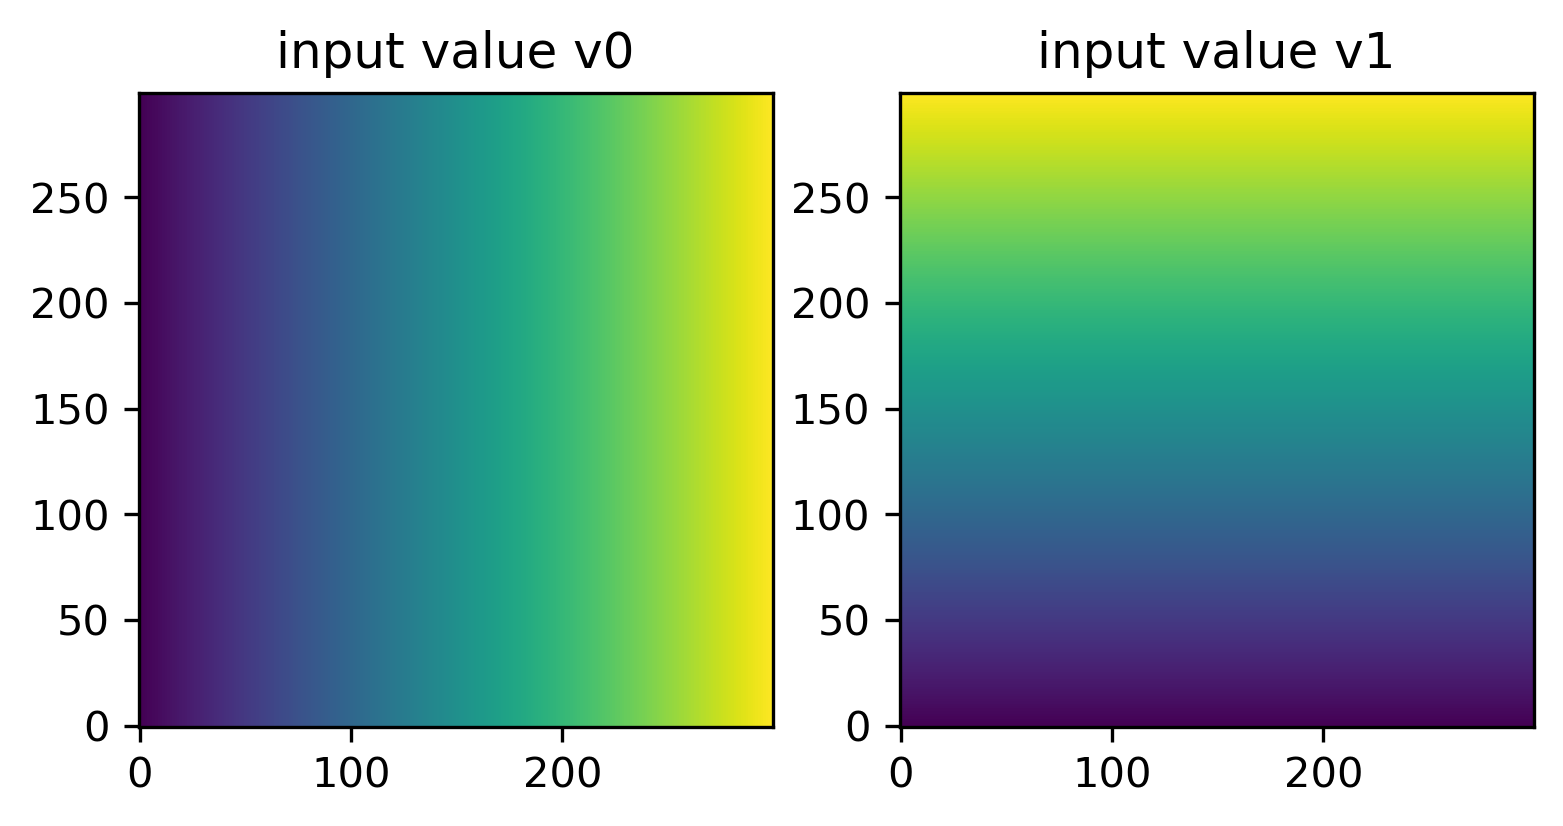

In [28]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(v0, origin='lower')
ax[0].set_title("input value v0")
ax[1].imshow(v1, origin='lower')
ax[1].set_title("input value v1")
plt.show()

Look, `v0` increases with the horizontal direction and remains constant on the
vertical, like the $x$ coordinate. While `v1` runs just on the opposite,
like $y$ coordinate.

In [29]:
v0flat = v0.flatten()  # make 1D arrays out of 2D array, reading from left to right
v1flat = v1.flatten()  #  then, goes for the next line
# that means: MxM matrix becomes M^2 vector
print('v0flat: ', v0flat, ' ; shape: ', v0flat.shape)
print('v1flat: ', v1flat, ' ; shape: ', v1flat.shape)

v0flat:  [-0.5        -0.49665552 -0.49331104 ...  0.49331104  0.49665552
  0.5       ]  ; shape:  (90000,)
v1flat:  [-0.5 -0.5 -0.5 ...  0.5  0.5  0.5]  ; shape:  (90000,)


In [30]:
batchsize = v0flat.size  # number of samples
y_in = np.zeros([batchsize,2])  # initialize
y_in[:,0] = v0flat # fill first component (index 0)
y_in[:,1] = v1flat # fill second component

Apply net to all these samples simultaneously! At the end, this is equivalent to the `apply_net` in the double loop.

In [31]:
t0 = time()
y_out=apply_net_batch(y_in) 
print("Elapsed time: %f seconds for %d inputs." % (time()-t0, batchsize))
y_out.shape

Elapsed time: 0.158004 seconds for 90000 inputs.


(90000, 1)

this is not a vector, but a funny flattened matrix of batchsize x 1. Why is `x 1`?

Let's go back from a flattened array to a real matrix

In [32]:
y_2D = np.reshape(y_out[:,0],[M,M]) 

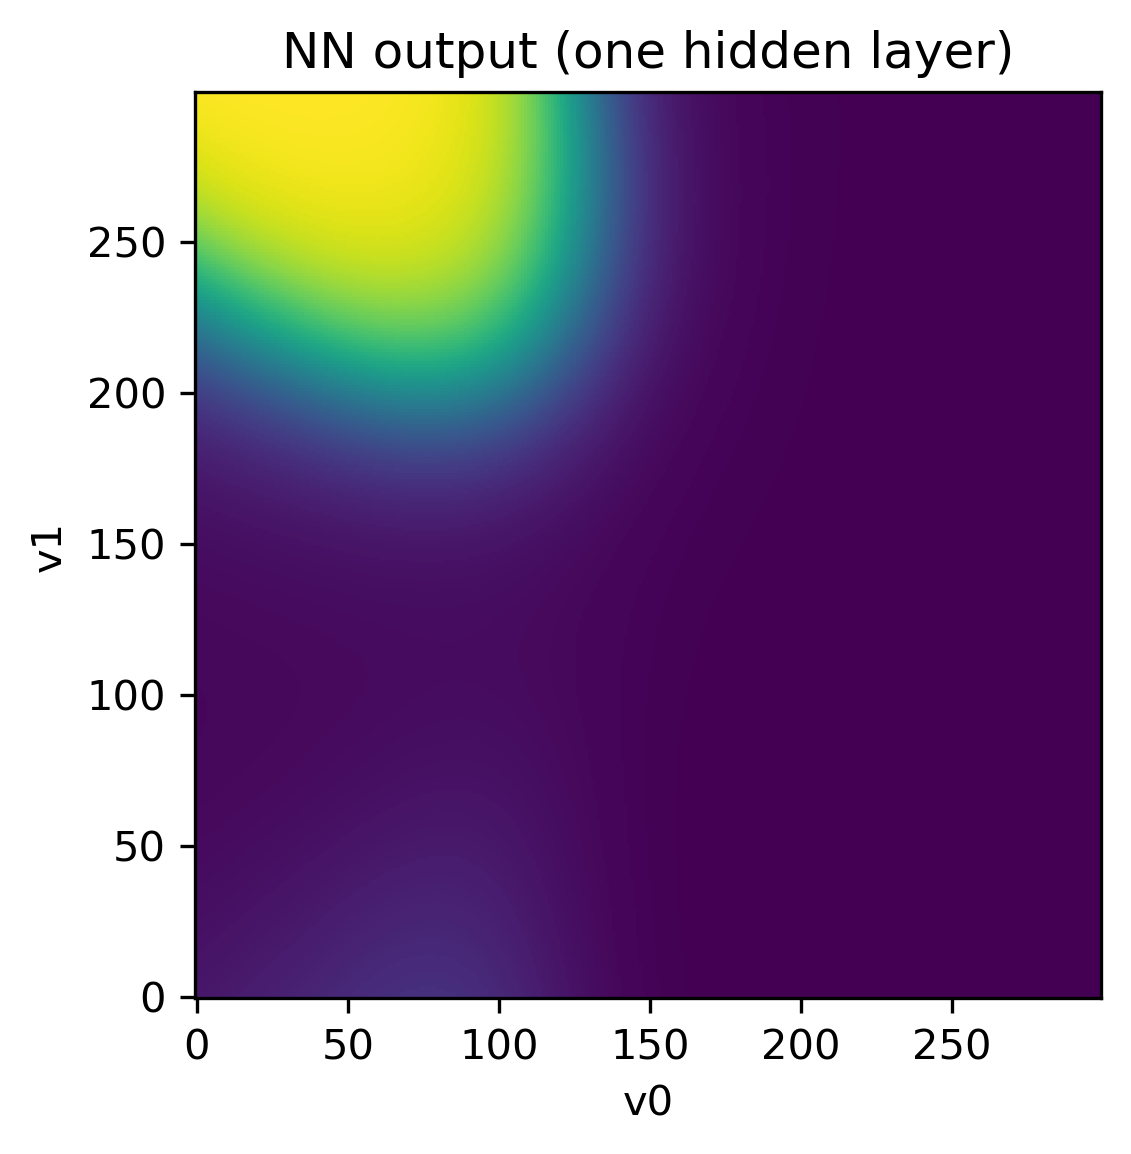

In [33]:
plt.imshow(y_2D, origin='lower')
plt.title("NN output (one hidden layer)")
plt.xlabel("v0")
plt.ylabel("v1")
plt.show()

### 3.4 A network with MANY hidden layers (same size each)

We can create a single `weights` hyper-matrix containing the weight of all hidden layers. It can be seen as a book with several sheets, where every sheet (slice) is a matrix corresponding to a certain weight matrix for that hidden layer. We increase the range of these weight in order to make them more relevant on the NN.

We will do the same for the `biases`. Before, it's a vector, then it becomes a matrix.

In [51]:
Nlayers = 20  # not counting the input layer nor the output layer
LayerSize = 100

# Note the extra dim at first for the weights and biases
weights = np.random.uniform(low=-3, high=3, size=[Nlayers,LayerSize,LayerSize]) 
biases = np.random.uniform(low=-1, high=1, size=[Nlayers,LayerSize])

# for the first layer having 2 inputs
weightsFirst = np.random.uniform(low=-1, high=1, size=[2,LayerSize])  # see the 2
biasesFirst = np.random.uniform(low=-1, high=1, size=LayerSize)

# for the final layer having 1 output
weightsFinal = np.random.uniform(low=-1, high=1, size=[LayerSize,1])  #see the 1
biasesFinal = np.random.uniform(low=-1, high=1, size=1)

In [52]:
def apply_multi_net(y_in):
    global weights, biases, weightsFinal, biasesFinal, Nlayers
    
    y = apply_layer_batch(y_in, weightsFirst, biasesFirst)    
    for j in range(Nlayers):
        y = apply_layer_batch(y, weights[j,:,:], biases[j,:])  # We take the j-th slice
    output = apply_layer_batch(y, weightsFinal, biasesFinal)
    
    return output

Let's explore a set of pair-values (inputs) using a flattened meshgrid, as before

In [53]:
# Generate a 'mesh grid', i.e. x,y values in an image
M = 300  # Let's do it quite resolutive
v0, v1 = np.meshgrid(np.linspace(-0.5,0.5,M), np.linspace(-0.5,0.5,M))
batchsize = M**2  # number of samples = M^2  (it's equivalent as before)

y_in = np.zeros([batchsize, 2])  # initialize
y_in[:,0] = v0.flatten() # fill first component (index 0)
y_in[:,1] = v1.flatten() # fill second component

Let's apply this dens NN in batch mode (300 $\times$ 300 = 90,000 different inputs at once)

In [54]:
t0 = time()
y_out = apply_multi_net(y_in) # apply net to all these samples! (it take some seconds)
print("Elapsed time: %f seconds for %d inputs." % (time()-t0, batchsize))
y_2D = np.reshape(y_out, [M,M]) # back to 2D image

Elapsed time: 9.719951 seconds for 90000 inputs.


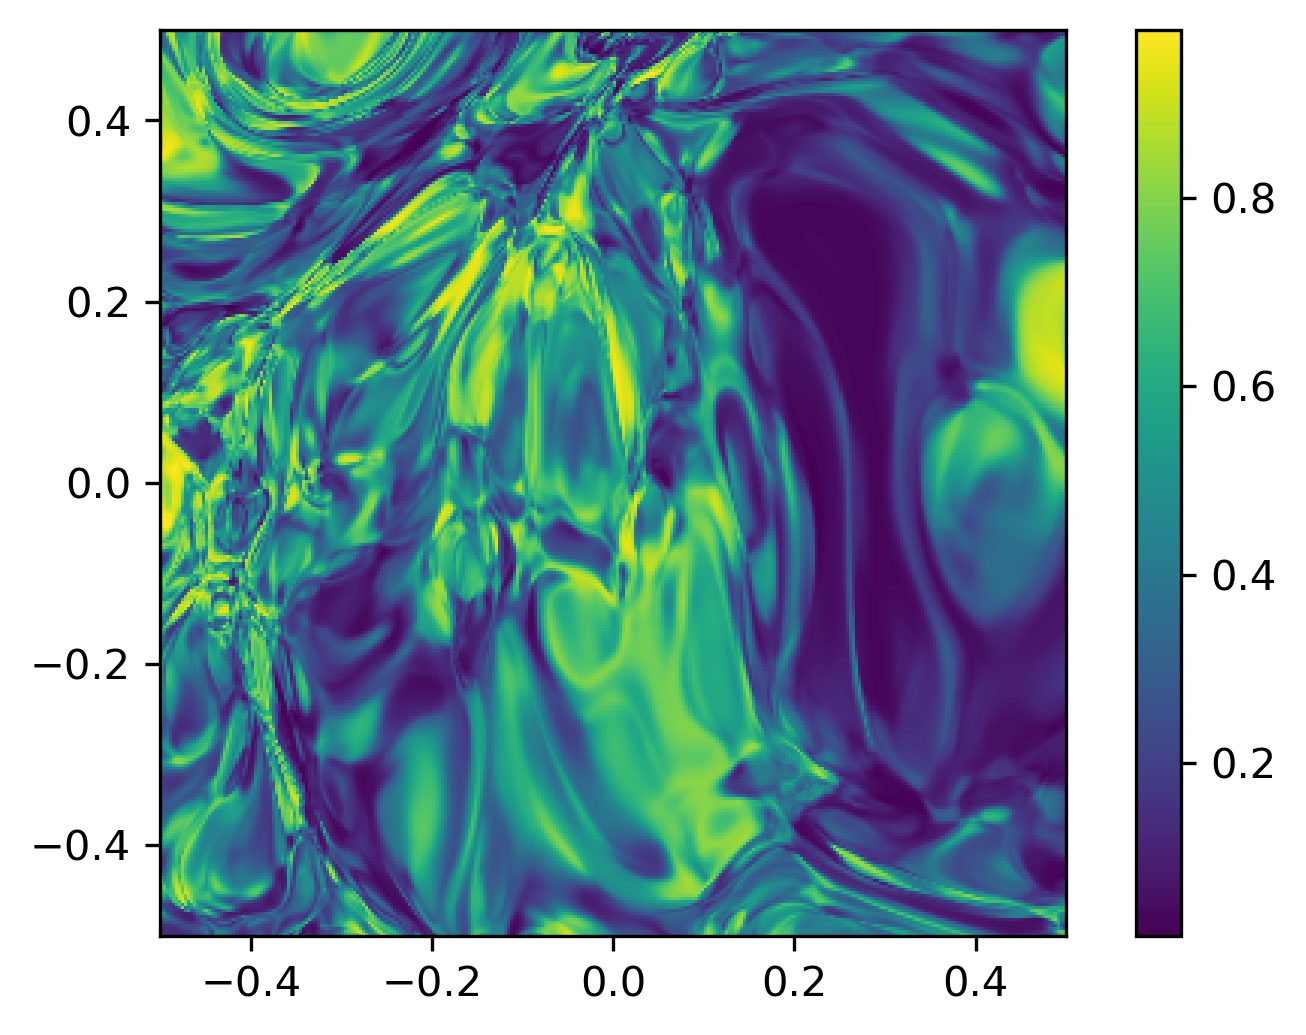

In [55]:
plt.imshow(y_2D, origin='lower', extent=[-0.5,0.5,-0.5,0.5])
plt.colorbar()
plt.show()

Why does this image look like this? What are hidden layers introducing?

## 4 Summing up in general functions

Let's define a couple of functions to create an arbitrary deep and fully connected neural network in batch mode.

In [39]:
def apply_layer(y_in, w, b, activation):
    """ Batch processing of a single layer:
           y_in: input values  -> shape: [batchsize, num_neurons_in]
           w:    weight matrix -> shape: [n_neurons_in, n_neurons_out]
           b:    bias vector   -> length: n_neurons_out
    
           activation is some string of the following ones:
             - sigmoid
             - jump
             - linear
             - reLU
    
           returns the values of the output neurons in the next layer 
              -> shape: [batchsize, n_neurons_out]
    """
    z = np.dot(y_in, w) + b
    if activation == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    elif activation == 'jump':
        return np.array(z>0, dtype='float')
    elif activation == 'linear':
        return z
    elif activation == 'reLU':
        return (z > 0) * z

    
def apply_net(y_in, weights, biases, activations):
    """ Apply a whole network of multiple layers.
          y_in: input values  -> shape: [batchsize, num_neurons_in]
          weights, biases and activations must be any iterable 
          which length is the layers' number containing
              weight matrix  -> shape: [n_neurons_in, n_neurons_out]
              bias vector    -> length: n_neurons_out
              activation str -> sigmoid, jump linear or reLU
          Alternatively, they can be extended matrices
          where a simple slicing generates the proper weight, 
          bias and activation.
    """
    y = y_in
    for j in range(len(biases)):
        y = apply_layer(y, weights[j], biases[j], activations[j])
    return y

## 5 Fancy visualization of Neural Networks with Pure Python

### 5.1 Some internal routines for plotting the network

In [40]:
BLUE_COLOR = [0, 0.4, 0.8]
ORANGE_COLOR = [1, 0.3, 0]

def plot_connection_line(ax, X, Y, W, vmax=1.0, linewidth=3):
    """ Draw a fancy line from (X[0], Y[0]) to (X[1], Y[1])
        according to the weight W into the frame ax.
    """
    t = np.linspace(0,1,20)  # free parameter to draw lines
    
    if W > 0:  # Color depending on the weight's sign
        col = BLUE_COLOR
    else:
        col = ORANGE_COLOR
    
    # fancy line from (X0, Y0) to (X1, Y1)
    xx = X[0] + t*(X[1] - X[0])  # Linear in horizontal
    yy = Y[0] + (3*t**2 - 2*t**3) * (Y[1] - Y[0])  # Round borders
    
    # plotting the line according to the weight
    ax.plot(xx, yy, alpha=abs(W)/vmax,
            color=col, linewidth=linewidth)

    
def plot_neuron_alpha(ax, X, Y, B, size=100.0, vmax=1.0):
    """ Draw a single neuron in position (X, Y) according to 
        the bias B, into the frame ax.
    """
    if B > 0:
        col = BLUE_COLOR
    else:
        col = ORANGE_COLOR
        
    ax.scatter([X], [Y], marker='o', c=col, alpha=abs(B)/vmax, 
               s=size, zorder=10)

    
def plot_neuron(ax, X, Y, B, size=100.0, vmax=1.0):
    """ Draw a single neuron in position (X, Y) independently to 
        the bias B, into the frame ax.
    """
    if B > 0:
        col = BLUE_COLOR
    else:
        col = ORANGE_COLOR
        
    ax.scatter([X], [Y], marker='o', c=col, s=size, zorder=10)
    
    
def visualize_network(weights, biases, activations, M=100,
                      y0range=[-1,1], y1range=[-1,1],
                      size=400.0, linewidth=5.0):
    """
    Visualize a neural network with 2 input 
    neurons and 1 output neuron (plot output vs input in a 2D plot)
    
    weights is a list of the weight matrices for the
    layers, where weights[j] is the matrix for the connections
    from layer j to layer j+1 (where j==0 is the input)
    
    weights[j][m,k] is the weight for input neuron k going to output neuron m
    (note: internally, m and k are swapped, see the explanation of
    batch processing in lecture 2)
    
    biases[j] is the vector of bias values for obtaining the neurons 
    in layer j+1, biases[j][k] is the bias for neuron k in layer j+1
    
    activations is a list of the activation functions for
    the different layers: choose 'linear','sigmoid', 
    'jump' (i.e. step-function), and 'reLU'
    
    M is the resolution (MxM grid)
    
    y0range is the range of y0 neuron values (horizontal axis)
    y1range is the range of y1 neuron values (vertical axis)
    """
    # Let's transpose the weight to be able the batch processing
    swapped_weights = []
    for j in range(len(weights)):
        swapped_weights.append(np.transpose(weights[j]))
        
    # Let's create a set of input-pairs by means of a mesh grid
    y0, y1 = np.meshgrid(np.linspace(y0range[0], y0range[1], M),
                         np.linspace(y1range[0], y1range[1], M))
    y_in = np.zeros([M*M, 2])
    y_in[:, 0] = y0.flatten()
    y_in[:, 1] = y1.flatten()
    
    # Let's apply the NN
    y_out = apply_net(y_in, swapped_weights, biases, activations)

    # We will plot a diagram at left and the result at right
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,4))
    
    
    # For the diagram
    
    #  1: posX and posY are arrays containing the positions of neurons
    posX = [[0, 0]]  # same column for both (at left)    
    posY = [[-0.5, +0.5]]  # for 2 inputs, let's putted centered in high

    
    vmax = 0.0 # for finding the maximum weight
    vmaxB = 0.0 # for maximum bias
    for j in range(len(biases)):  # for every layer on the NN
        n_neurons = len(biases[j])  # neurons in the current layer
        
        posX.append(np.full(n_neurons, j+1))  # next column to the previous one
        posY.append(np.array(range(n_neurons)) - 0.5 * (n_neurons-1)) # spread
        
        vmax = np.maximum(vmax, np.max(np.abs(weights[j])))  # to get the maximum
        vmaxB = np.maximum(vmaxB, np.max(np.abs(biases[j])))

    #   2: plot connections
    for j in range(len(biases)):  # for each layer
        for k in range(len(posX[j])):  # for each neuron
            for m in range(len(posX[j+1])):  # for each following neuron
                plot_connection_line(ax[0],  # first column of the plot
                                     [posX[j][k], posX[j+1][m]], # [X0,X1]
                                     [posY[j][k], posY[j+1][m]], # [Y0,Y1]
                                     swapped_weights[j][k,m],    # its weight
                                     vmax=vmax,  # to get normalized plots
                                     linewidth=linewidth)
    
    #   3: plot neurons
    for k in range(len(posX[0])):  # input neurons (have no bias!)
        plot_neuron(ax[0], posX[0][k], posY[0][k],
                    vmaxB, vmax=vmaxB, size=size)
        
    for j in range(len(biases)): # all other neurons
        for k in range(len(posX[j+1])):
            plot_neuron_alpha(ax[0], posX[j+1][k], posY[j+1][k],
                              biases[j][k], vmax=vmaxB, size=size)
    
    ax[0].axis('off')
    
    # now: the output of the network
    img = ax[1].imshow(np.reshape(y_out, [M,M]),
                       origin='lower',
                       extent=[y0range[0],y0range[1],y1range[0],y1range[1]])
    ax[1].set_xlabel(r'$y_0$')
    ax[1].set_ylabel(r'$y_1$')
    
    axins1 = inset_axes(ax[1],
                        width="40%",  # width = 50% of parent_bbox width
                        height="5%",  # height : 5%
                        loc='upper right')

    imgmin = np.min(y_out)
    imgmax = np.max(y_out)
    color_bar = fig.colorbar(img, cax=axins1, orientation="horizontal",
                             ticks=np.linspace(imgmin,imgmax,3))
    cbxtick_obj = plt.getp(color_bar.ax.axes, 'xticklabels')
    plt.setp(cbxtick_obj, color="white")
    axins1.xaxis.set_ticks_position("bottom")

    ax[1].set_title(activations[0])
    
    plt.show()

### 5.2 No hidden layer NN

Let's visualize a simple network (no hidden layer) with different activation functions.

Notice that no hidden layer means that weight, biases and activations are list of length 1.

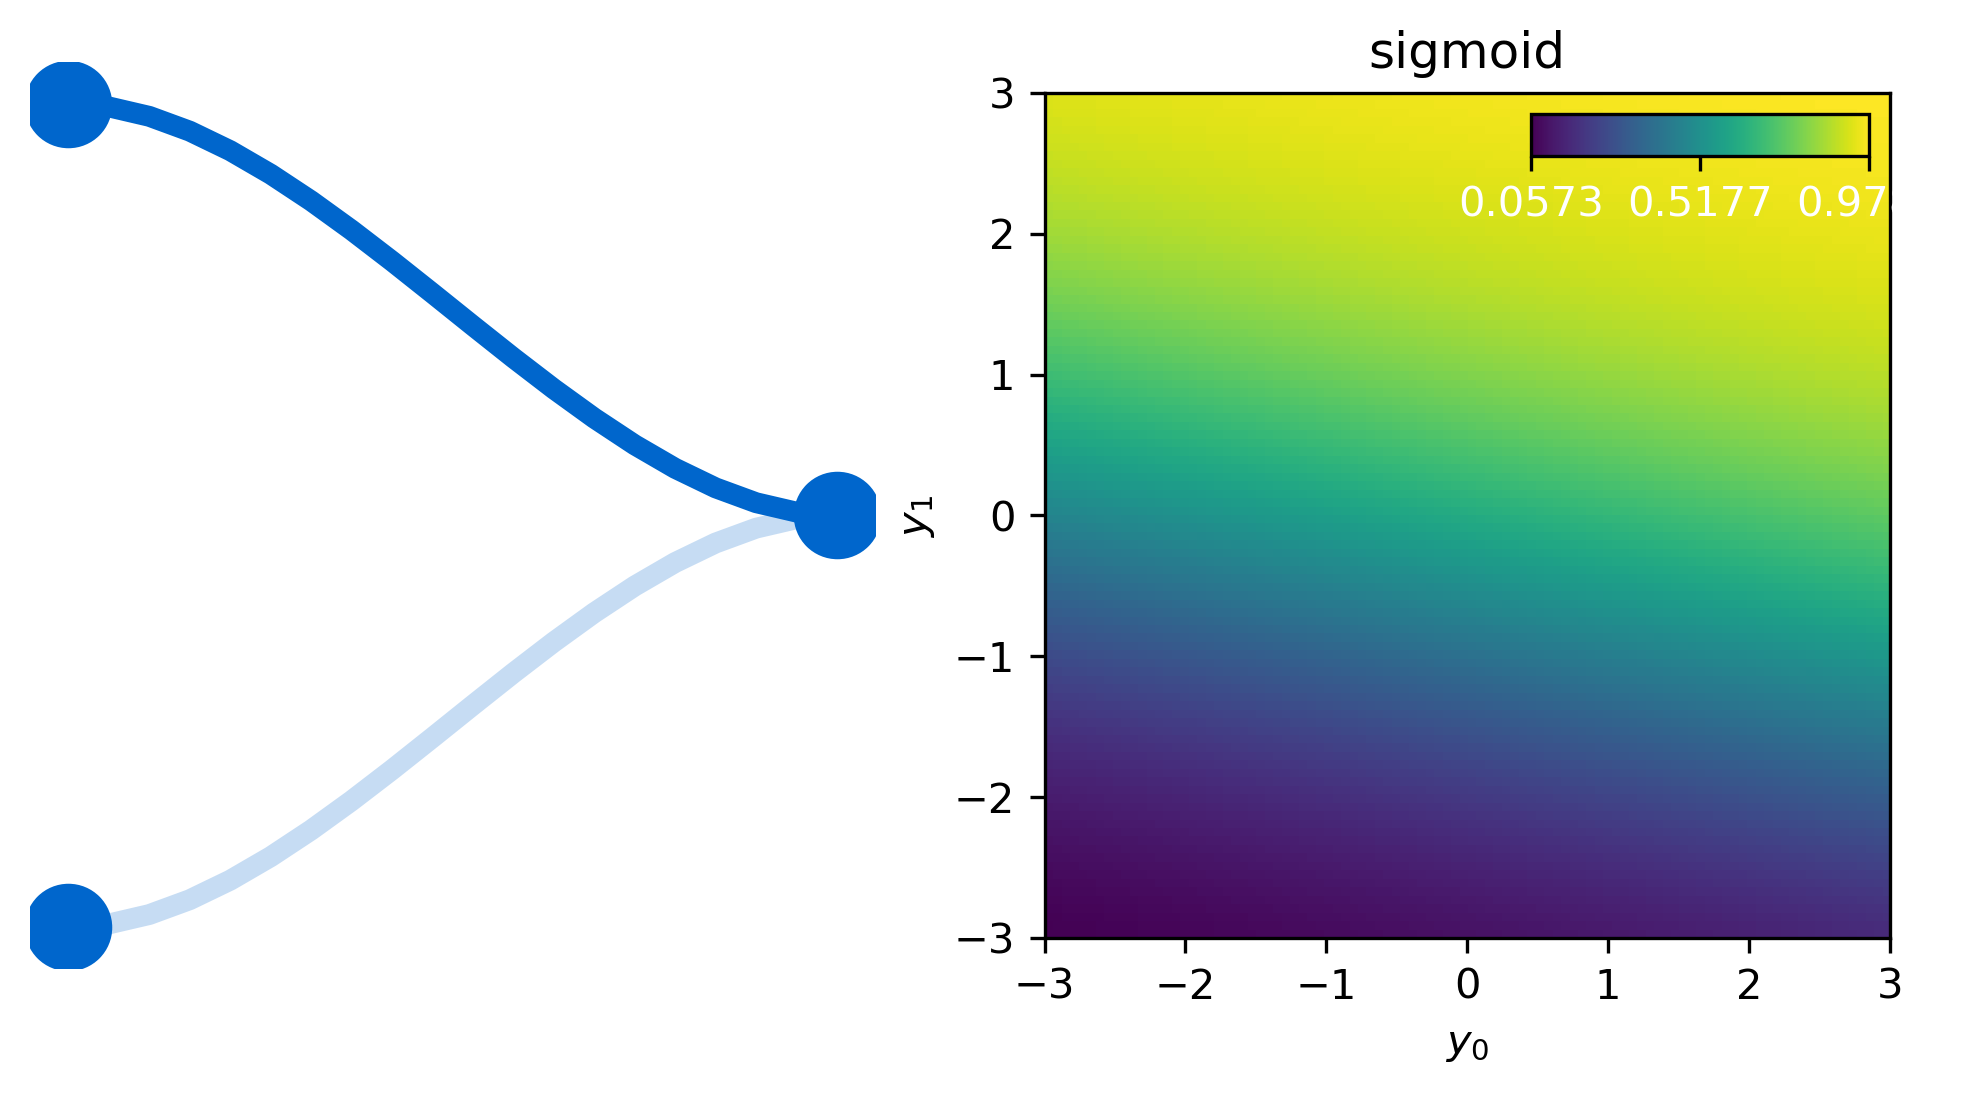

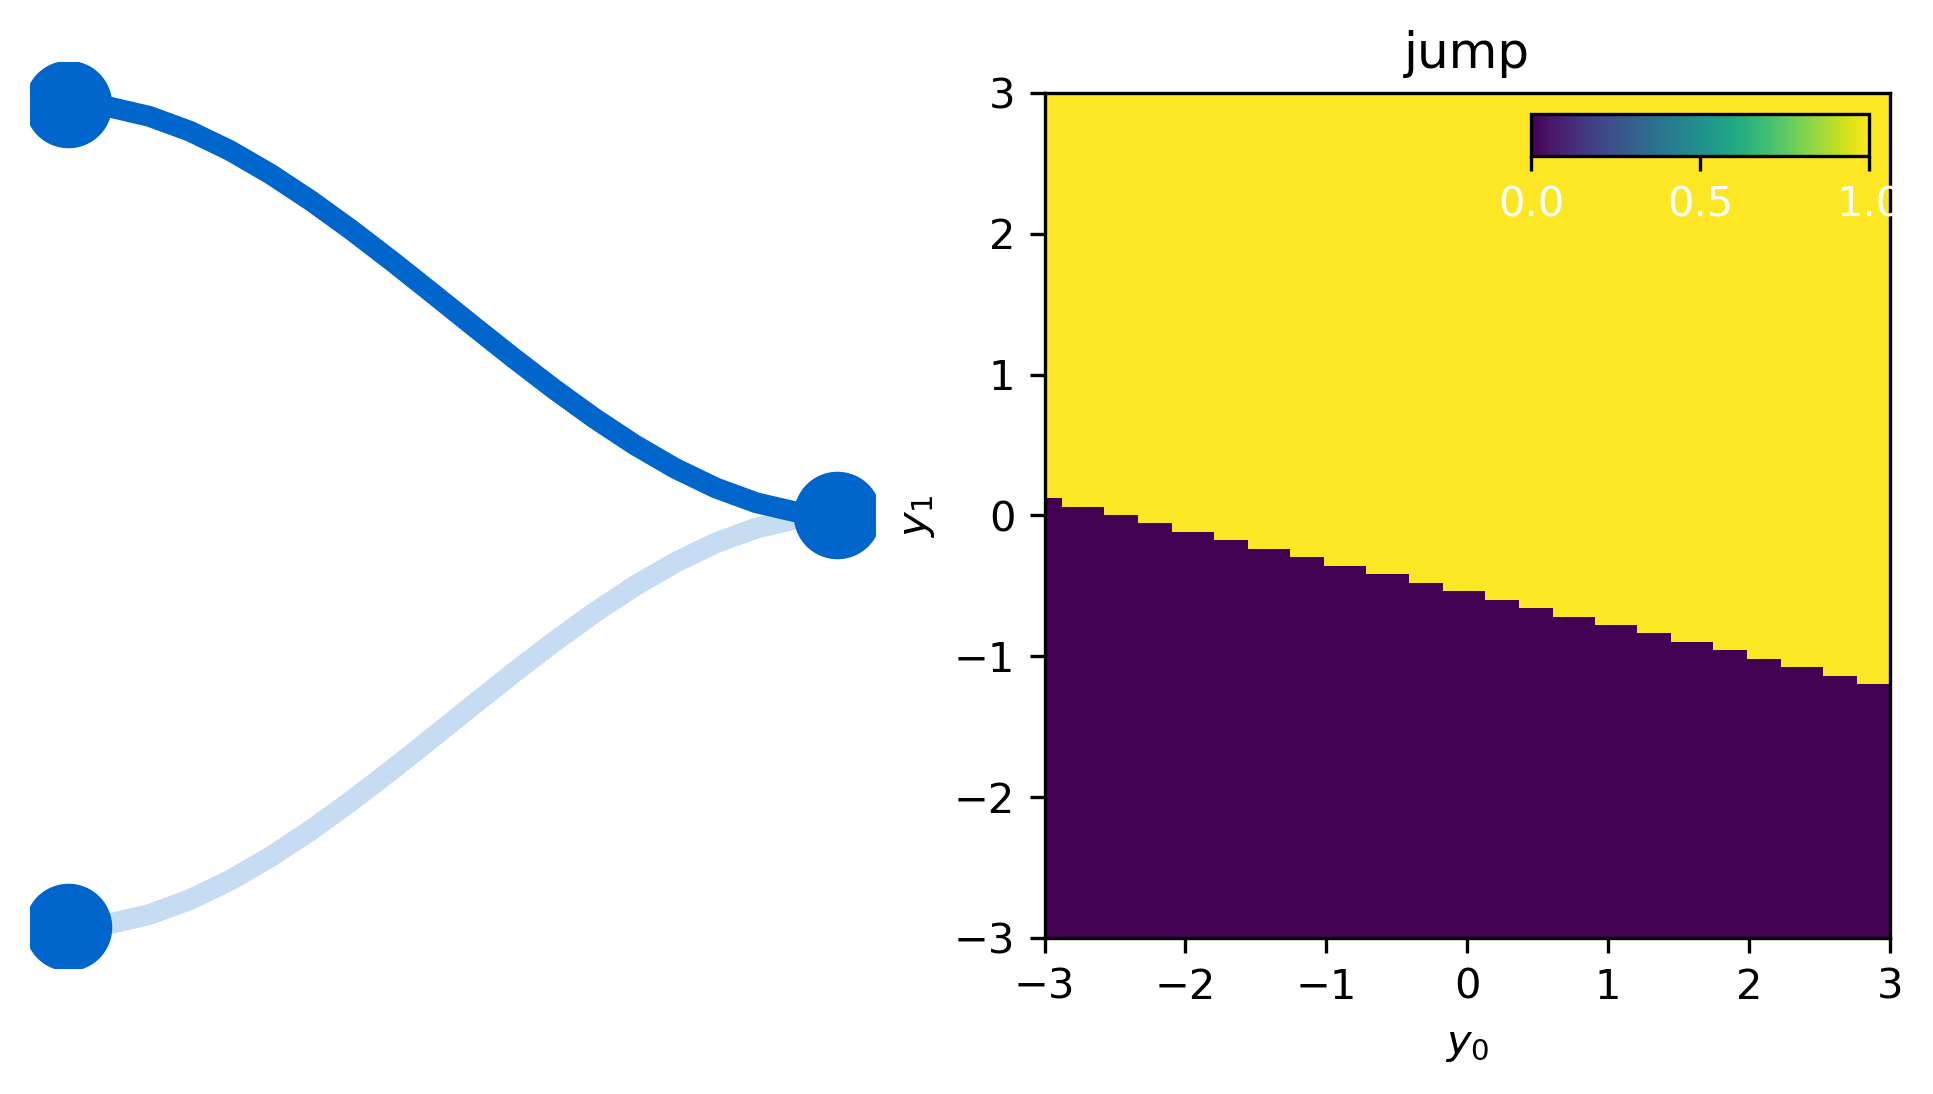

In [41]:
RANGE = [-3, 3]  # all tests will be with the same range

weights=[ [     # a list of matrices (length 1 in this case)
    [0.2, 0.9]  # from 2 input neurons to a single output neuron: 1x2
    ] ]

biases=[   # a list of vectors (length 1 in this case)
    [0.5]  # bias for 1 single output neuron: 1 value
    ]

visualize_network(weights, biases, ['sigmoid'],
                  y0range=RANGE, y1range=RANGE)

visualize_network(weights, biases, ['jump'],
                  y0range=RANGE, y1range=RANGE)

### 5.3 Deep dense NN

Let's visualize a NN of 1 hidden layer of 3 neurons using different activation functions

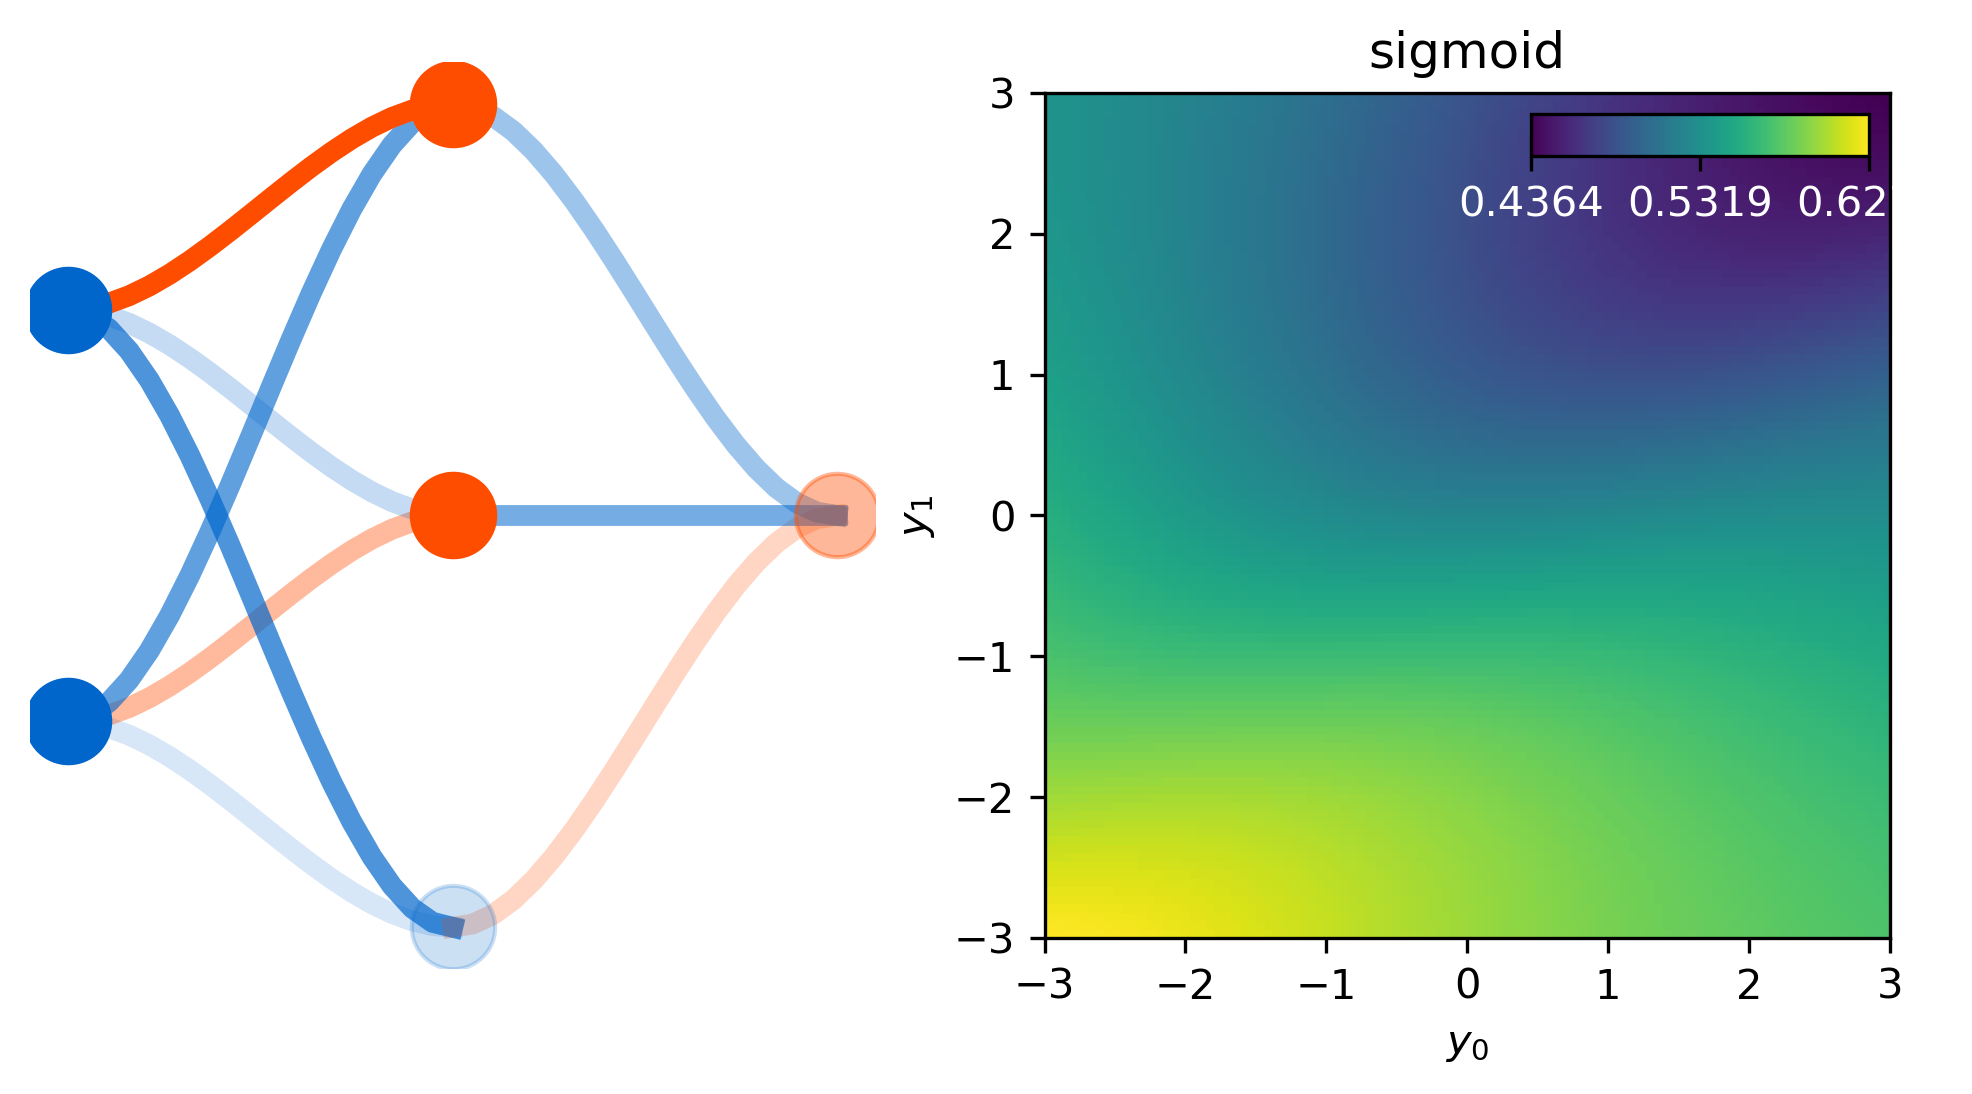

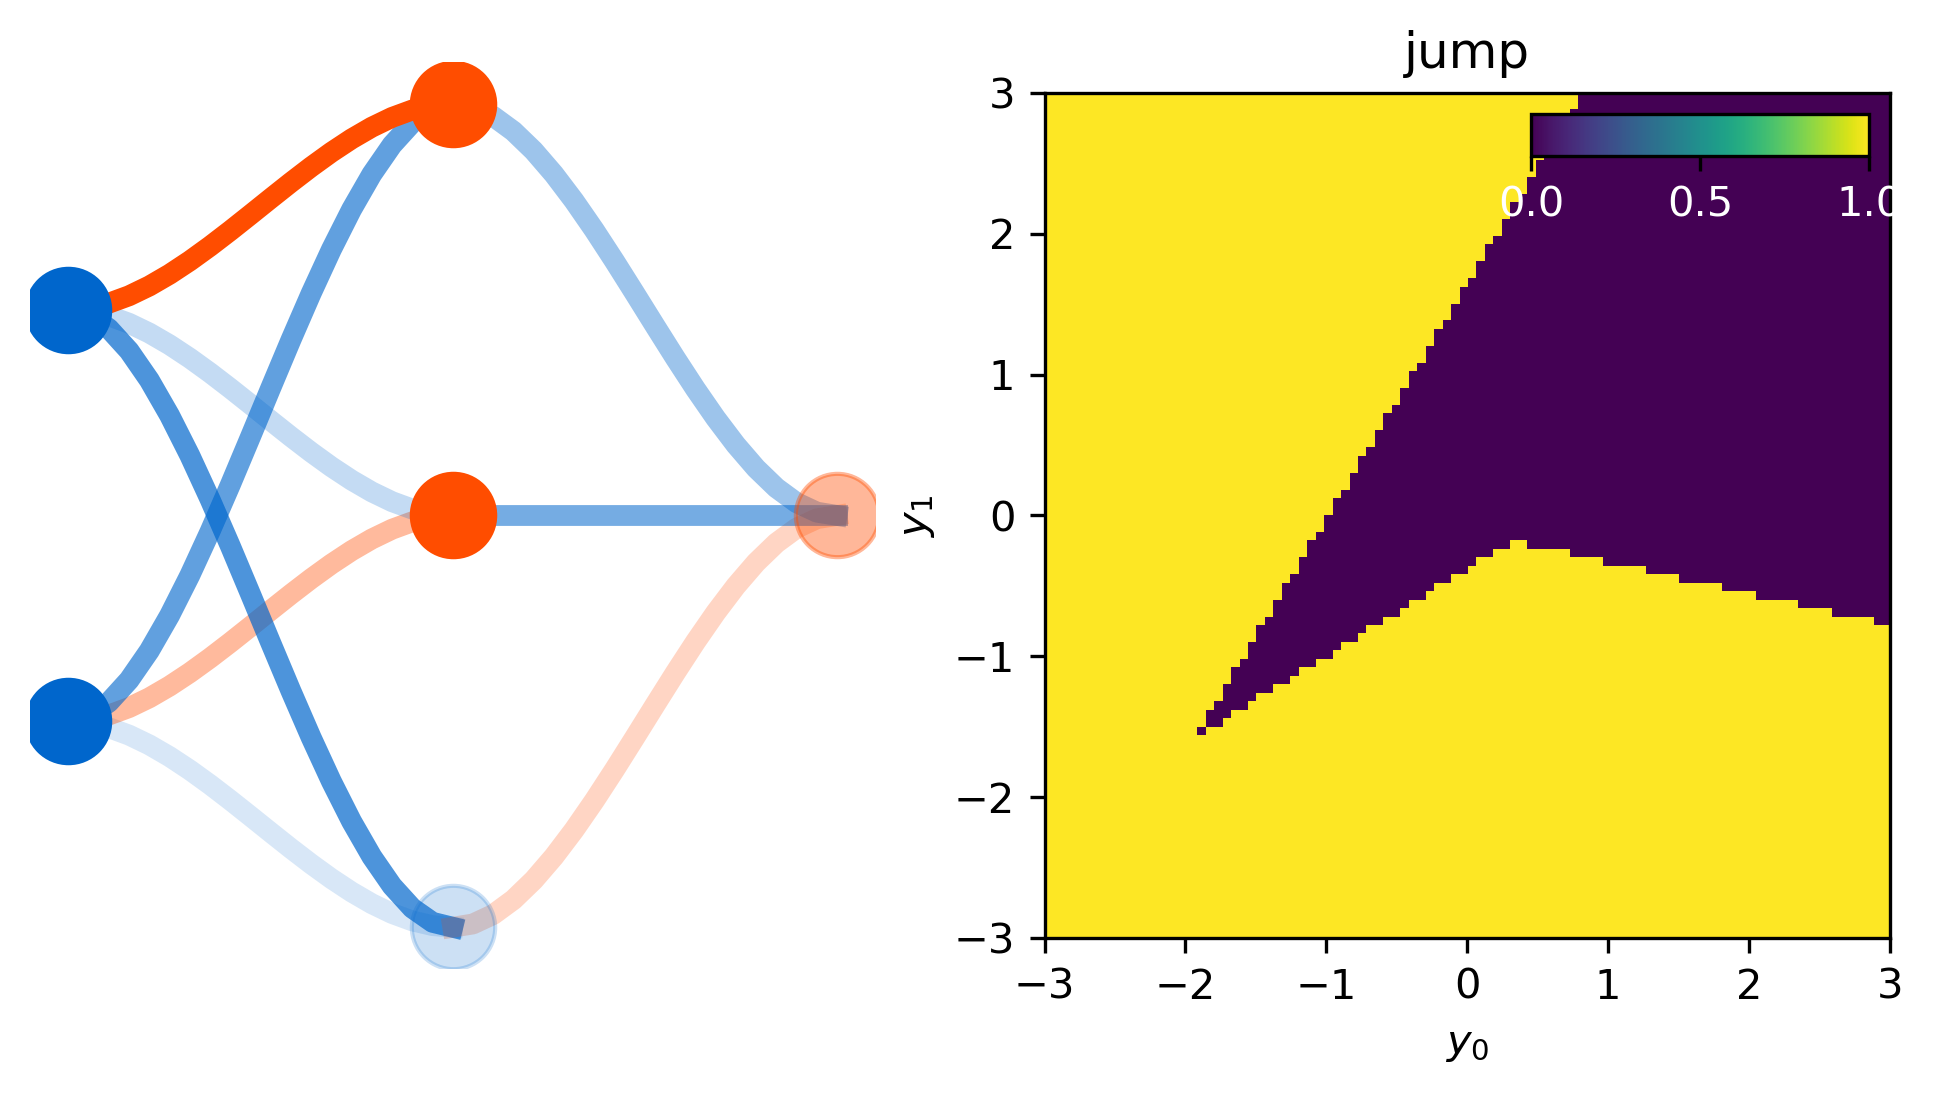

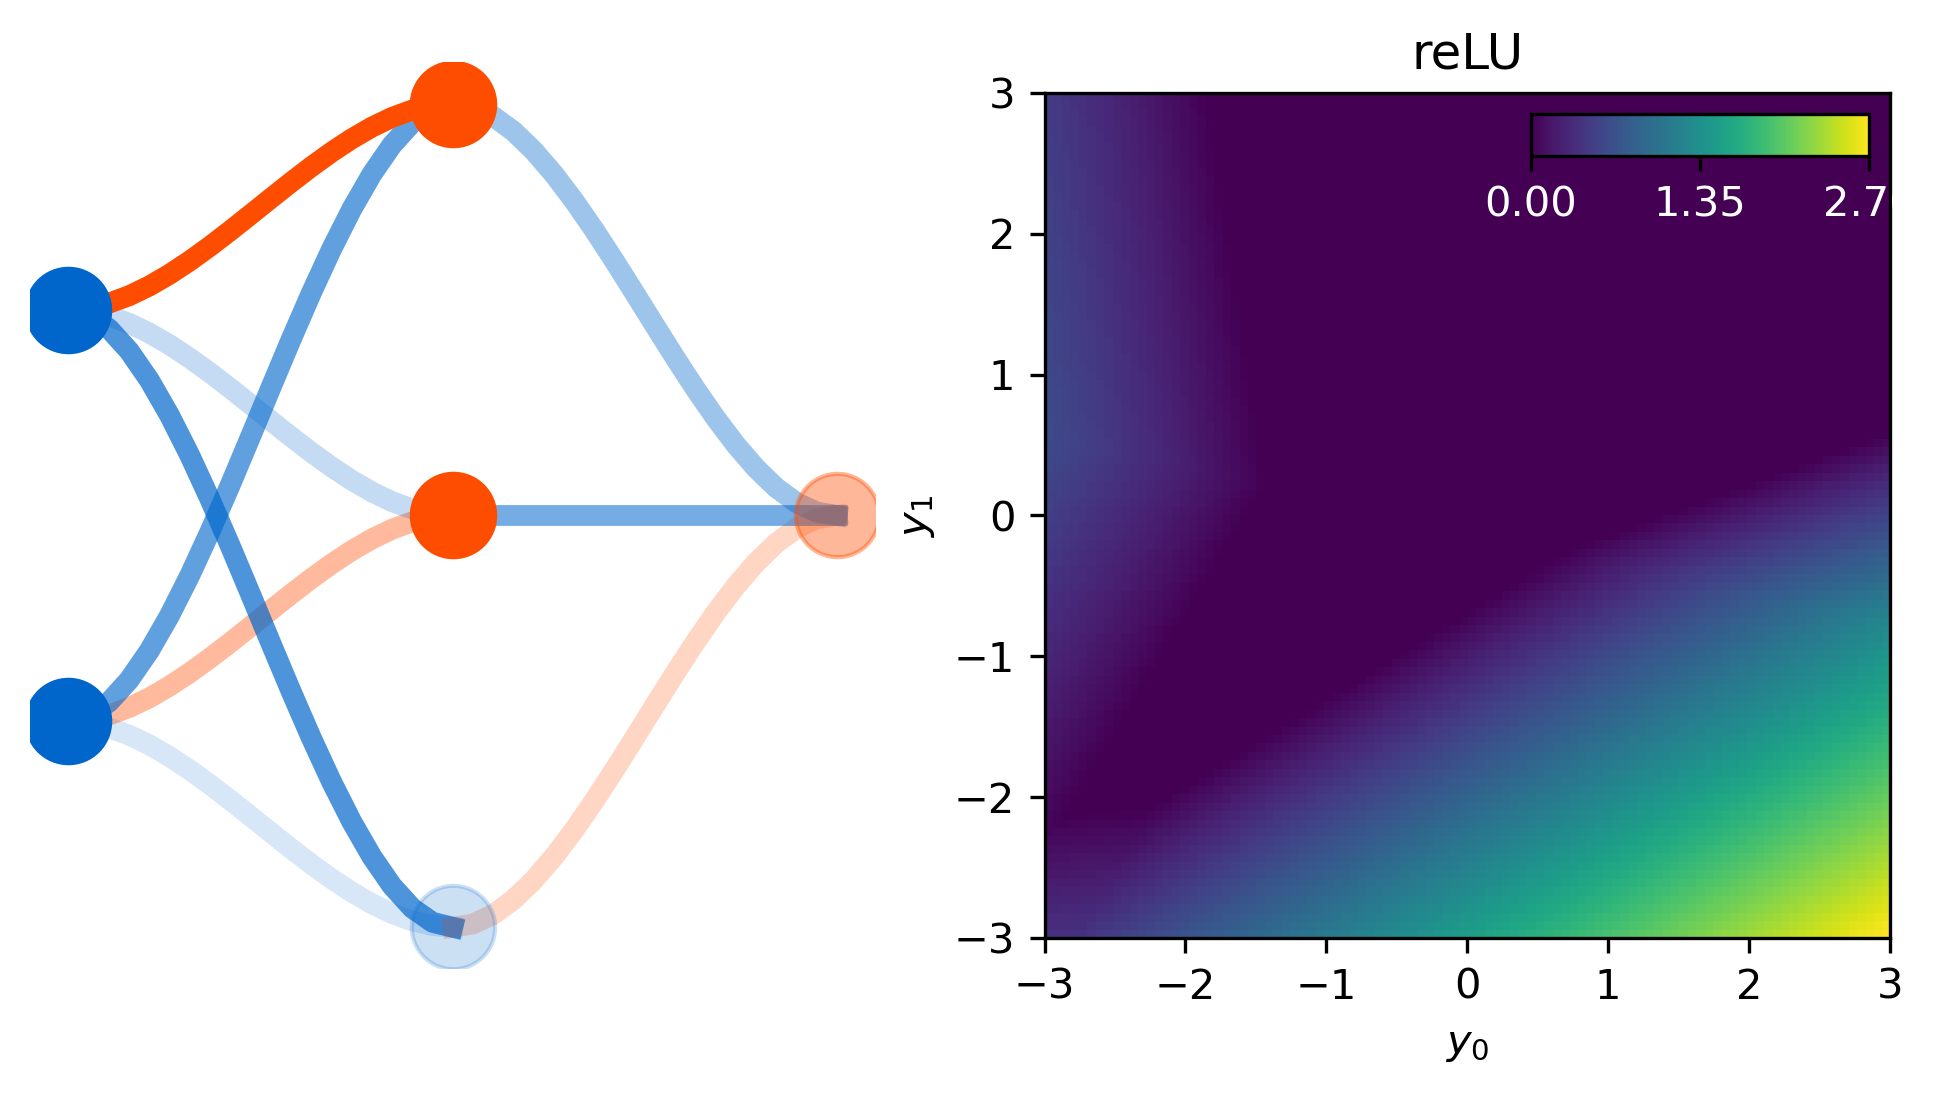

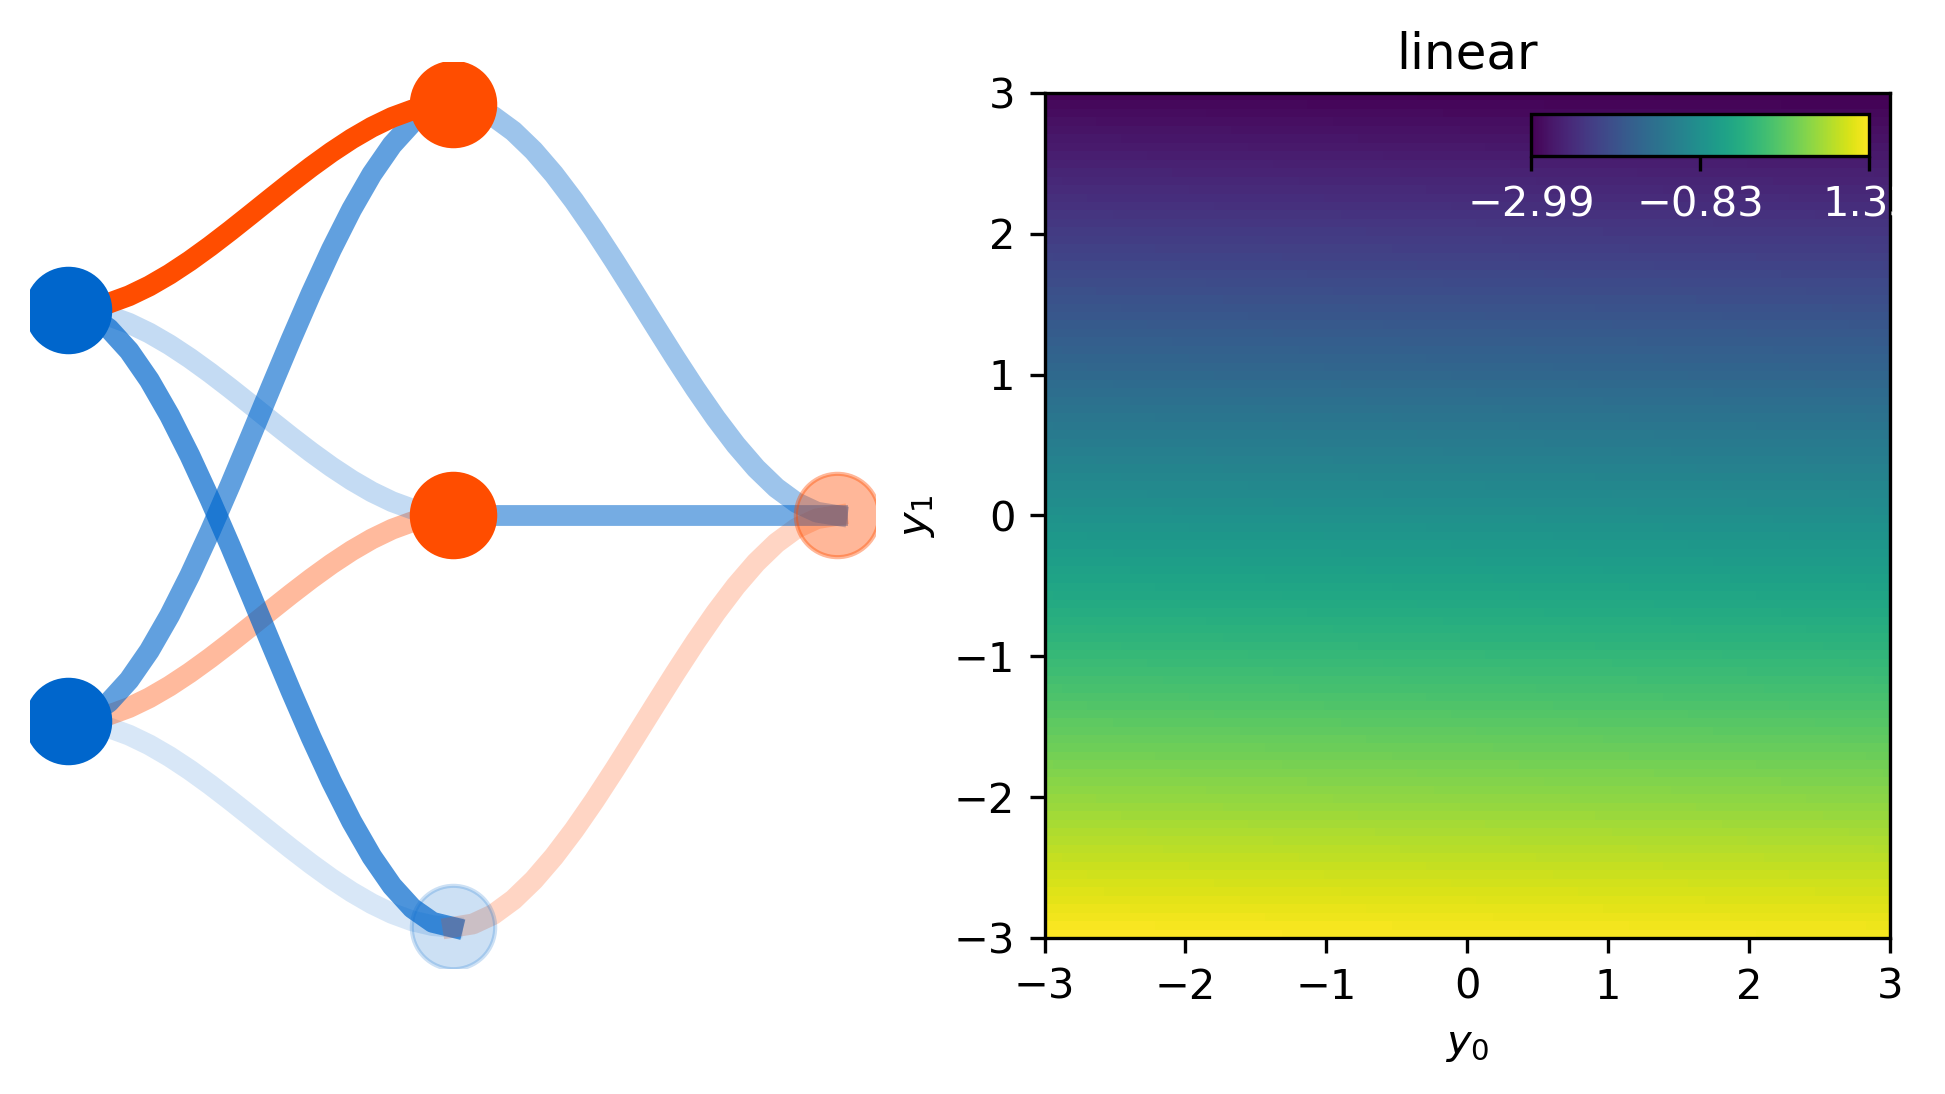

In [42]:
weights = [ [  # a list of matrices (length 2 in this case)
        [0.2, 0.9],  # hidden layer of 3 neurons
        [-0.5, 0.3], #  -> 3 neurons with 2 inputs: matrix of 3x2
        [0.8, -1.3]
    ],                 
    [ 
        [-0.3,0.7,0.5] # from 3 hidden neurons to one output: 1x3
    ]  ]

biases=[  # a list of vectors (length 2 in this case)
        [0.1, -0.5, -0.5], # biases of 3 hidden neurons
        [-0.2] # bias for output neuron
       ]

visualize_network(weights, biases, ['sigmoid', 'sigmoid'],
                  y0range=RANGE, y1range=RANGE)

visualize_network(weights, biases, ['jump', 'jump'],
                  y0range=RANGE, y1range=RANGE)

visualize_network(weights, biases, ['reLU', 'reLU'],
                  y0range=RANGE, y1range=RANGE)

visualize_network(weights, biases, ['linear', 'linear'],
                  y0range=RANGE, y1range=RANGE)

More layers and some activation function combination

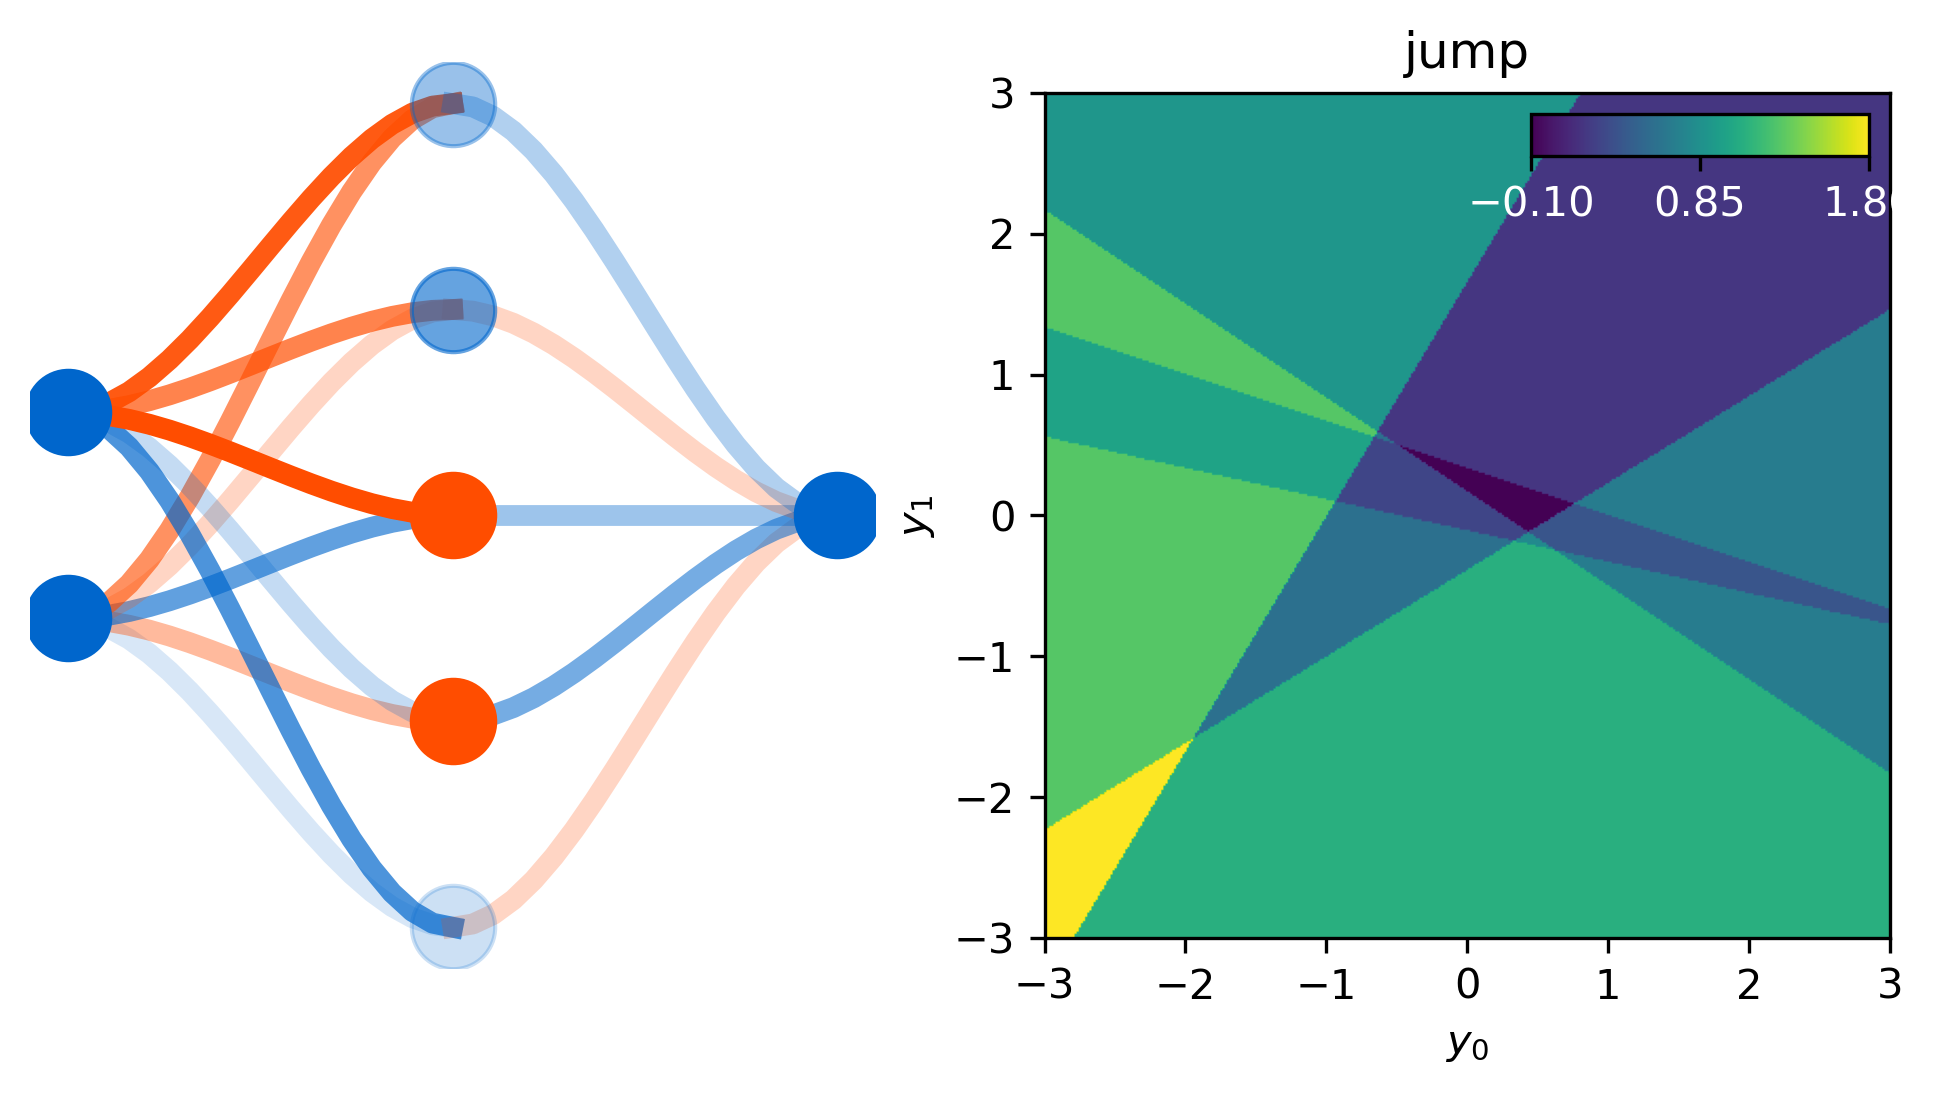

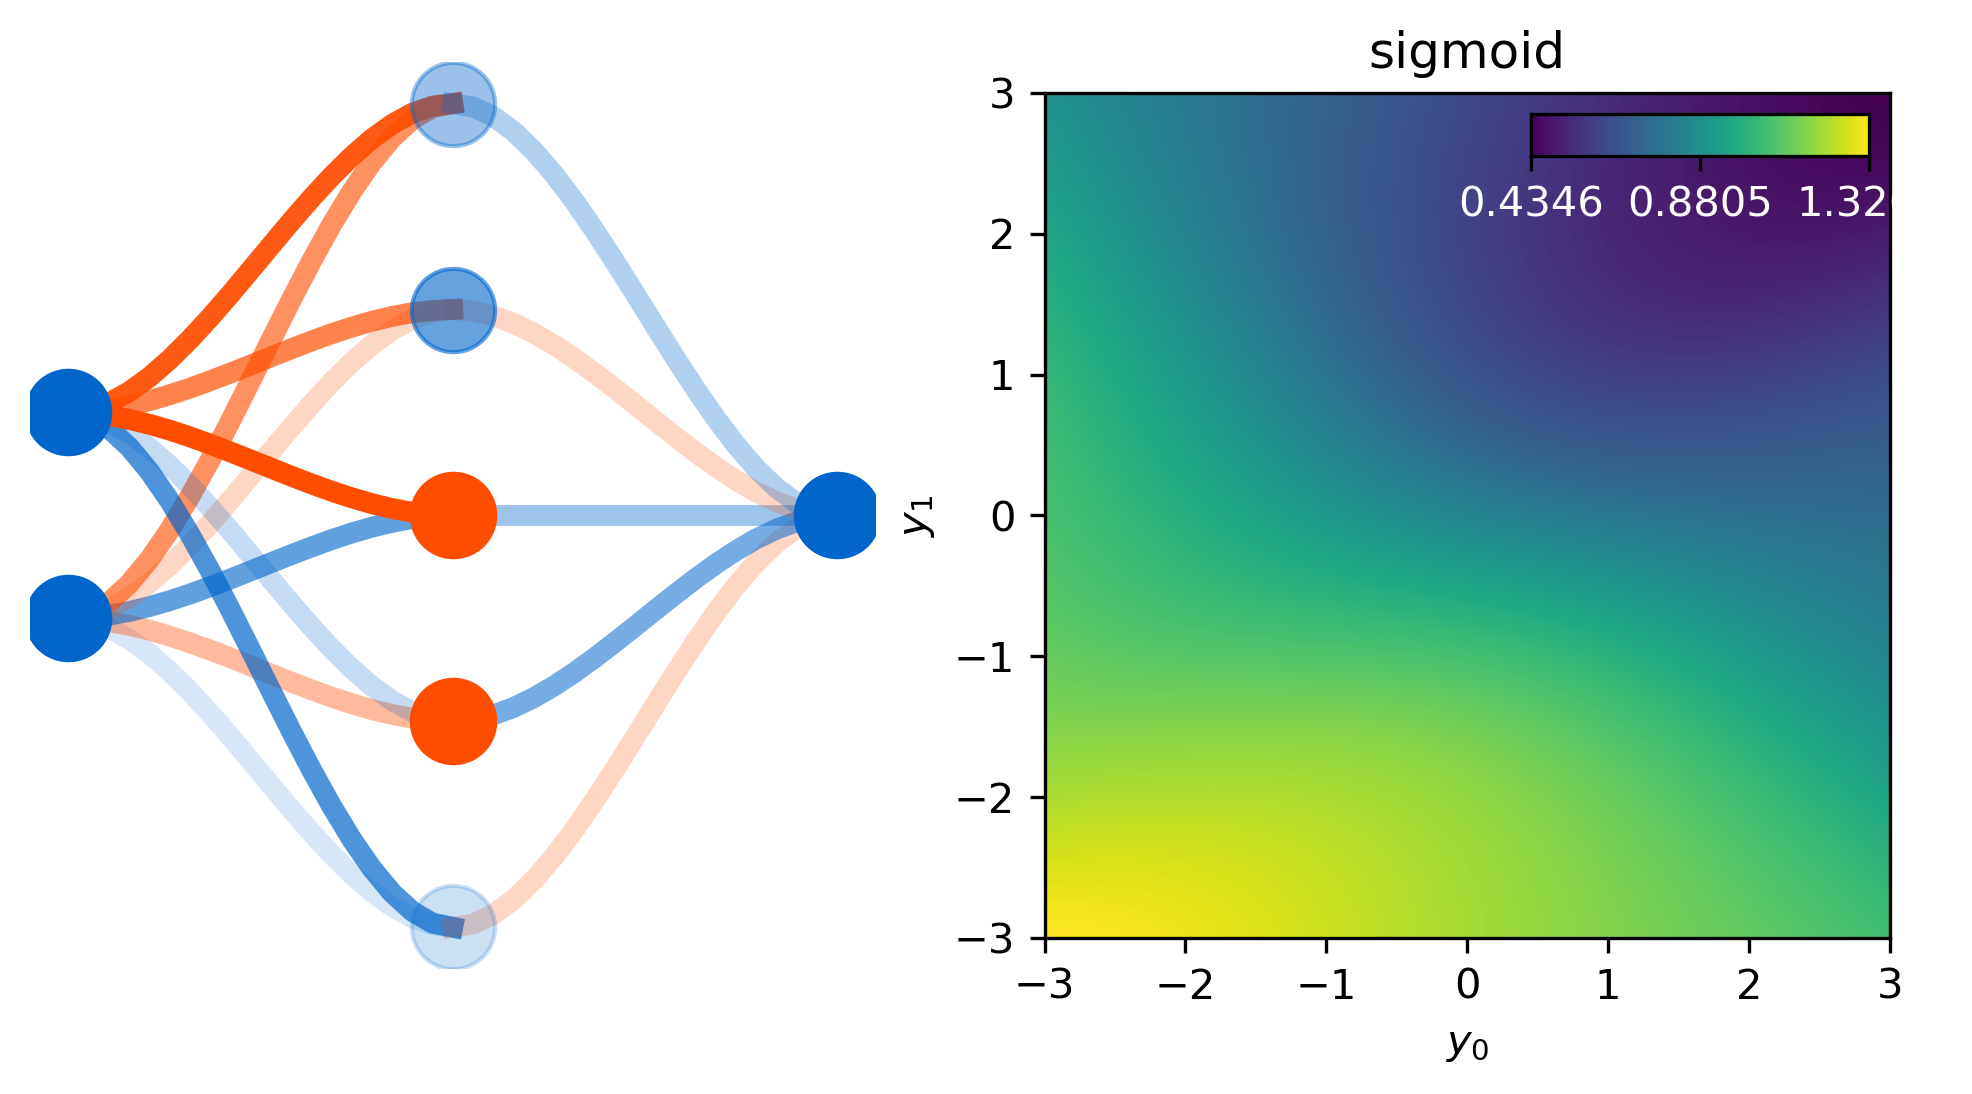

In [43]:
# now with 5 intermediate neurons, for fun:

weights = [ [  # list of matrices
                [0.2, 0.9],  # 5x2 
                [-0.5, 0.3], 
                [0.8, -1.3], 
                [-0.3, -0.9], 
                [-0.8, -1.2] 
          ],
          [ 
                [-0.3, 0.7, 0.5, -0.3, 0.4]  # 1x5
          ] ]

biases = [  # list of vectors
                [0.1, -0.5, -0.5, 0.3, 0.2],  # bias for the hidden layer
                [0.5]  # bias for the output bias
         ]   # bias for the output neuron

visualize_network(weights, biases,              
                  activations=[ 'jump', 'linear' ],
                  y0range=RANGE, y1range=RANGE, M=400)

visualize_network(weights, biases,              
                  activations=[ 'sigmoid', 'linear' ],
                  y0range=RANGE, y1range=RANGE, M=400)

Let's sharper the sigmoid: scale all weights and biases!

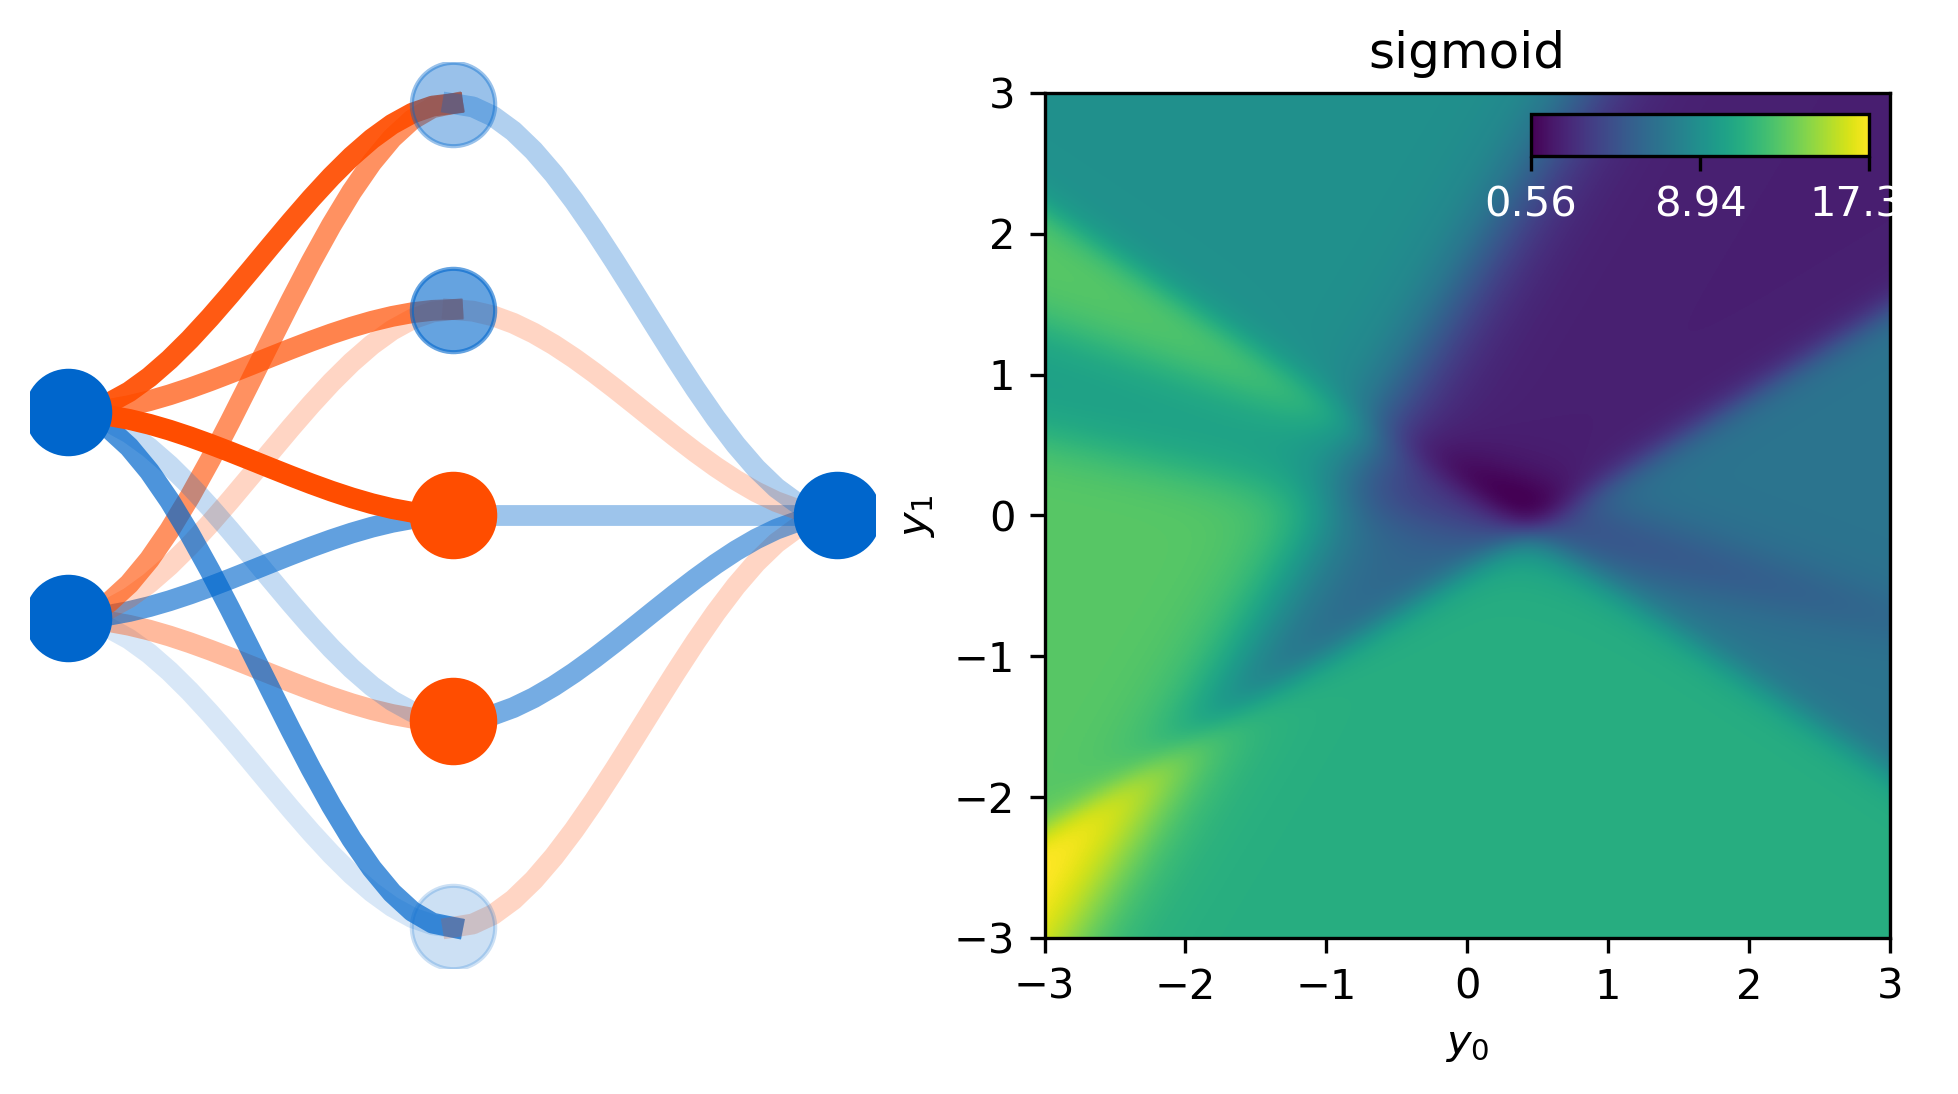

In [44]:
factor=10.0  # as high as sharpen 

# this needs np.array(), because you cannot do factor*<python-list>
ws = [factor*np.array(matrix) for matrix in weights]
bs = [factor*np.array(vector) for vector in biases]

visualize_network(ws, bs, activations=[ 'sigmoid', 'linear' ],
                  y0range=RANGE, y1range=RANGE, M=400)

### 5.4 Something not random

Many superimposed lines can be used to construct arbitrary shapes, with only a single hidden layer.

Let's draw a kind of circle by means of several lines.

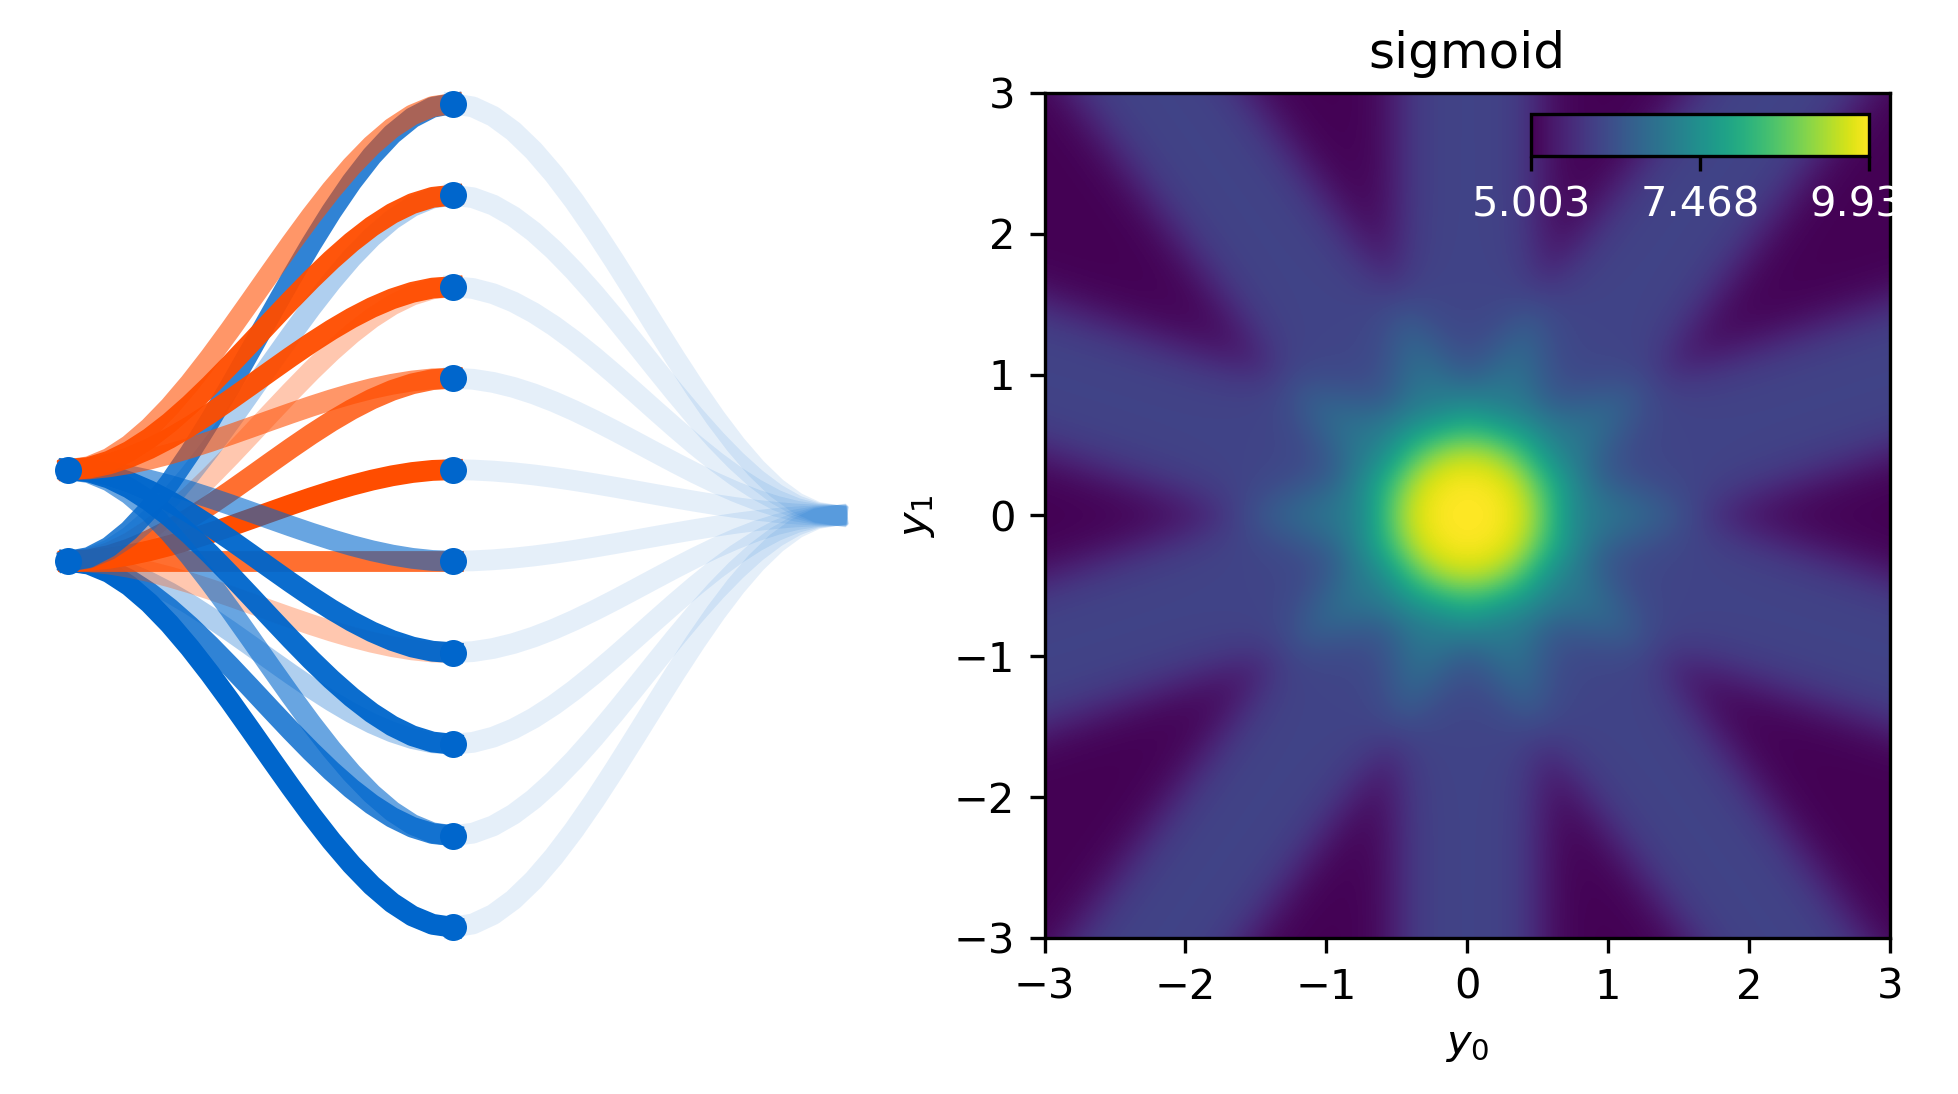

In [45]:
factor = 10  # factor to sharpen sigmoid

n_lines = 10  # number of lines to draw

phi = np.linspace(0, 2*np.pi, n_lines+1)  # Angular variable
phi = phi[0:-1]  # the last value is 2pi, which is equivalent to the 0

weight_hidden = np.zeros([n_lines, 2])   # comment this shape
weight_hidden[:,0] = factor*np.cos(phi)  # x=cos(phi)
weight_hidden[:,1] = factor*np.sin(phi)  # y=sin(phi)

bias_hidden = np.full(n_lines, factor*(+0.5))  # all neurons acts equally

visualize_network(weights=[ 
                            weight_hidden,           # from input to hidden
                            np.full([1,n_lines],1.0) # from hidden to output
                          ],
                  biases=[ 
                            bias_hidden,
                            [0.0]
                         ],
                  activations=['sigmoid',  # activation for hidden
                               'linear'    # activation for output
                              ],
                  y0range=RANGE, y1range=RANGE,
                  size=30.0, M=400)

Play with different factors above to see how sigmoid behavior changes.

`n_lines` sets the number of lines on the figure, but what does it represent in the NN? Play with different number of lines.

Why weights are made of sines and cosines?

What are biases here? Play with it.

Why the weights corresponding from hidden to output layer are full of ones?